# Visualización en R
Taller elaborado por Alfonso Prado  
Migrado a Jupyter por Charles Escobar  
PUCE - 2022  

# ggplot2 
* **[Visualizaciones de Cantidades](#Cantidades)**
* **[Visualizaciones de Dispersión](#Dispersion)**
* **[Visualización de Proporciones](#Proporciones)** 
* **[Visualizaciones de Data Geoespacial](#Geoespacial)** 

ggplot2 es un paquete de visualización de datos para el lenguaje R. 

Es un esquema general para la visualización de datos que divide los gráficos en componentes semánticos en una modalidad de capas. 

ggplot2 es un paquete mejorado de los gráficos base en R (plot) 

La versión última es 3.3.5 y puede descargarse desde cran

Forma parte del paquete Tidyverse, un sistema para la manipulación, exploración y visualización de datos que comparten una filosofía de diseño común. Los paquetes de Tidyverse están destinados a ser usados por estadísticos y científicos de datos. Básicamente, tidyverse trata sobre las conexiones entre las herramientas que hacen posible el flujo de trabajo. 

Normalmente incluido cuando se instala pero si no, estas son las instrucciones: 

In [7]:
install.packages('ggplot2',repos='http://cran.us.r-project.org') # Ejecutar desde terminal

In [8]:
install.packages('tidyverse',repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


In [9]:
library('ggplot2')

* El sistema de capas permite definir en primer lugar los datos base del gráfico a desarrollar para luego ir aumentando funcionalidad al gráfico. Por ejemplo usted puede definir inicialmente un gráfico XY para luego aumentar líneas de tendencia, puntos de control, temas etc. 
* Cada capa se define a continuación de la anterior y el orden es importante 
* Podemos catalogar las capas en los siguientes conceptos 

https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf

**Capas**

* Data: Especifica los dataset que se usarán, solo tiene un argumento: data-xxxx, solo utiliza data frames, otras capas podrían definir data adicional. 
* Aesthetics: aes() especifica el mapeo de estética a los datos 
* Geometrics: geom.xxx() especifica un objeto geométrico (tipo de gráfico) y combina: datos, mapeo estético, funciones estadísticas (stat) y ajuste de posición. Ej: puntos, líneas, barras 
* Facets: facet_xxx(). Es una capa que permite desagregar relaciones complejas en pequeños múltiples 
* Statistics: stat_xx(). Cada geom está asociado a una función estadística, pero puede ser cambiado mediante esta capa para especificar exactamente lo que se desea ver 
* Coordinates: coord.xxx(). El sistema de coordenadas determina cómo se combinan la estética x y para colocar elementos en el gráfico. Ej coord_polar(). 
* Themes: theme_xxx(). Los temas controlan la visualización de todos los elementos del gráfico que no son datos, como colores, líneas, tamaño letra etc. 
* Labs: No es en realidad una capa, pero permite crear títulos, leyendas en los ejes. 

In [10]:
install.packages('png')

In [11]:
options(warn=-1)

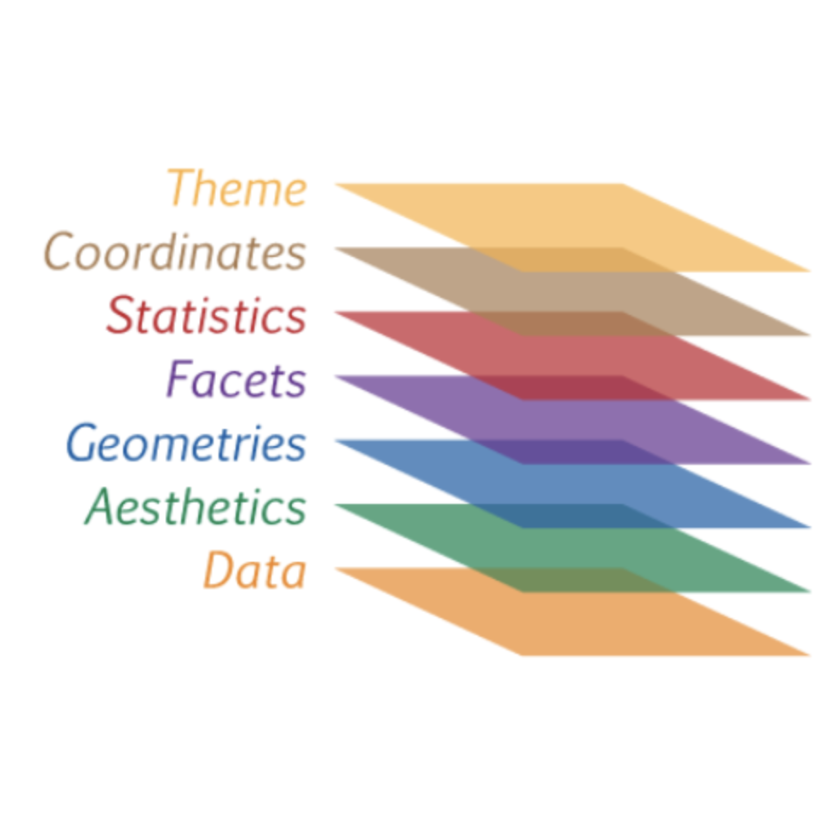

In [38]:
library('png')
img<-readPNG('ge_themes.png')
grid::grid.raster(img)

<a id='Cantidades'></a>
## VISUALIZACION DE CANTIDADES
En muchos escenarios, estamos interesados en la magnitud de algún conjunto de números.
Por ejemplo, es posible que queramos visualizar el volumen total de ventas de diferentes
marcas de automóviles o el número total de personas que viven en diferentes ciudades. 

La visualización estándar en este escenario es el gráfico de barras, que tiene algunas
variantes, incluidas barras simples y barras agrupadas y apiladas. Las alternativas
al diagrama de barras son el diagrama de puntos (SCATTER CHARTS) y el mapa de calor. 

### DIAGRAMAS DE BARRA
Hay dos tipos de gráficos de barras: geom_bar() y geom_col(). 
geom_bar() hace que la altura de la barra sea proporcional al número de casos en cada grupo. Si desea que las alturas de las barras representen valores en los datos, use geom_col() en su lugar. 

geom_bar() usa stat_count() por defecto: cuenta el número de observaciones en cada posición x.
geom_col() usa stat_identity(): deja los datos como están. 

geom_bar aes incluye las siguientes propiedades :
x y alpha colour  fill group linetype size 

In [14]:
rm(list=ls())
require(dplyr)
require(ggplot2)
require(ggplot2movies)
require(scales)
require(lubridate)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2movies

Loading required package: scales

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [15]:
data(mpg)
names(mpg)
unique(mpg$class)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

[1] "compact"    "midsize"    "suv"        "2seater"    "minivan"   
[6] "pickup"     "subcompact"

In [16]:
print(mpg$class)

  [1] "compact"    "compact"    "compact"    "compact"    "compact"   
  [6] "compact"    "compact"    "compact"    "compact"    "compact"   
 [11] "compact"    "compact"    "compact"    "compact"    "compact"   
 [16] "midsize"    "midsize"    "midsize"    "suv"        "suv"       
 [21] "suv"        "suv"        "suv"        "2seater"    "2seater"   
 [26] "2seater"    "2seater"    "2seater"    "suv"        "suv"       
 [31] "suv"        "suv"        "midsize"    "midsize"    "midsize"   
 [36] "midsize"    "midsize"    "minivan"    "minivan"    "minivan"   
 [41] "minivan"    "minivan"    "minivan"    "minivan"    "minivan"   
 [46] "minivan"    "minivan"    "minivan"    "pickup"     "pickup"    
 [51] "pickup"     "pickup"     "pickup"     "pickup"     "pickup"    
 [56] "pickup"     "pickup"     "suv"        "suv"        "suv"       
 [61] "suv"        "suv"        "suv"        "suv"        "pickup"    
 [66] "pickup"     "pickup"     "pickup"     "pickup"     "pickup"    
 [71] 

Vamos a crear un diagrama de barras  sobre la variable class  
por defecto X es mapeado a la variable  
En este caso, si voy a contar registros solo necesito indicar la columna que es el factor

In [17]:
print(mpg$class)

  [1] "compact"    "compact"    "compact"    "compact"    "compact"   
  [6] "compact"    "compact"    "compact"    "compact"    "compact"   
 [11] "compact"    "compact"    "compact"    "compact"    "compact"   
 [16] "midsize"    "midsize"    "midsize"    "suv"        "suv"       
 [21] "suv"        "suv"        "suv"        "2seater"    "2seater"   
 [26] "2seater"    "2seater"    "2seater"    "suv"        "suv"       
 [31] "suv"        "suv"        "midsize"    "midsize"    "midsize"   
 [36] "midsize"    "midsize"    "minivan"    "minivan"    "minivan"   
 [41] "minivan"    "minivan"    "minivan"    "minivan"    "minivan"   
 [46] "minivan"    "minivan"    "minivan"    "pickup"     "pickup"    
 [51] "pickup"     "pickup"     "pickup"     "pickup"     "pickup"    
 [56] "pickup"     "pickup"     "suv"        "suv"        "suv"       
 [61] "suv"        "suv"        "suv"        "suv"        "pickup"    
 [66] "pickup"     "pickup"     "pickup"     "pickup"     "pickup"    
 [71] 

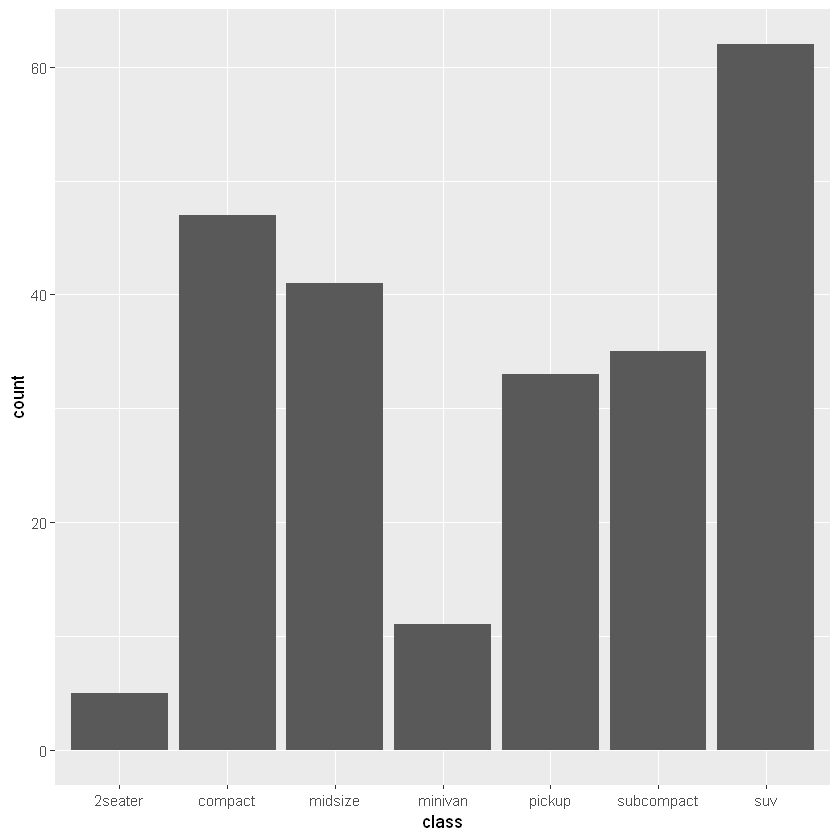

In [18]:
ggplot(mpg, aes(x=class))+
  geom_bar()

Si mapeamos la Y a la variable, el gráfico que se presenta es de barras horizontales

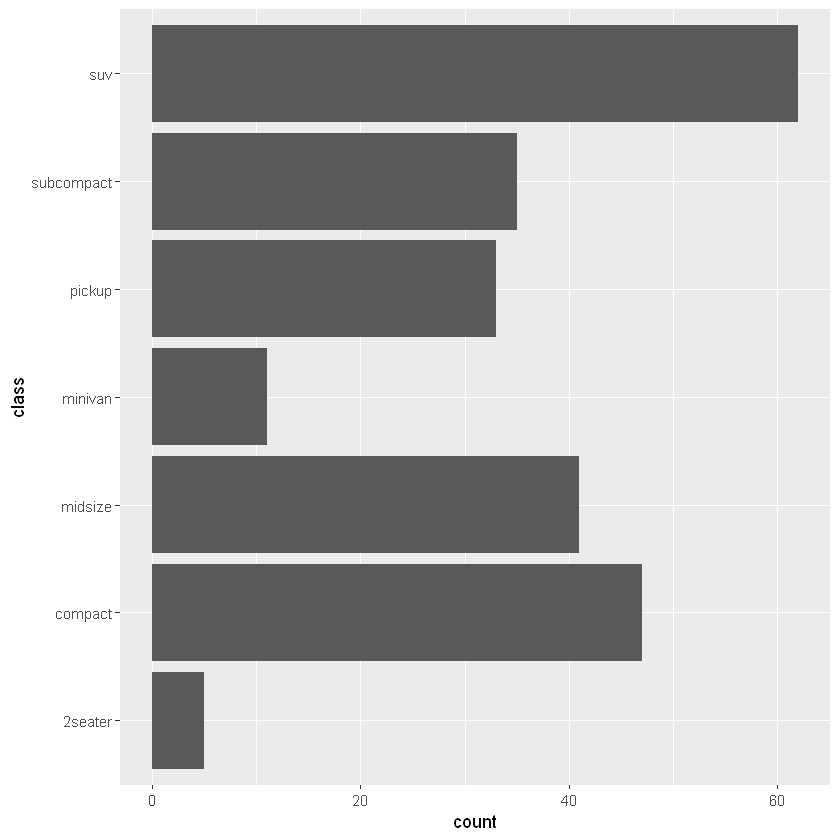

In [19]:
ggplot(mpg, aes(y=class))+
  geom_bar()

Si queremos agrupar la data basado en otro factor usaremos  fill y color  
note que en este caso el aesthetics esta parte en el ggplot y parte en el geom. Esto demuestra el concepto de herencia 

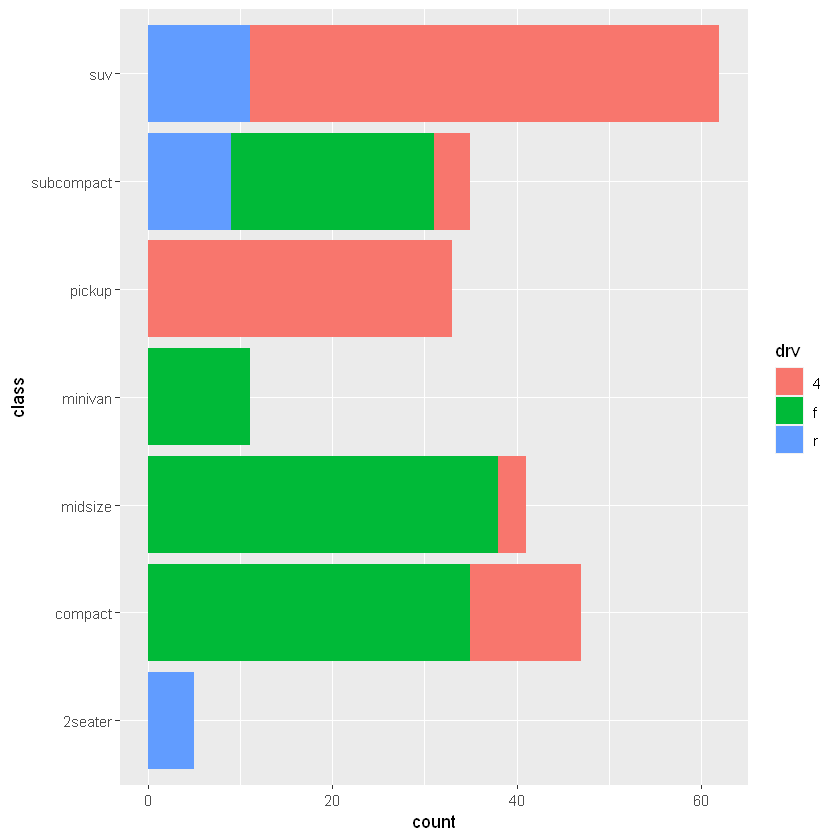

In [20]:
ggplot(data=mpg , aes(y=class))+
  geom_bar(aes(fill  = drv))

O todo junto en el geom()

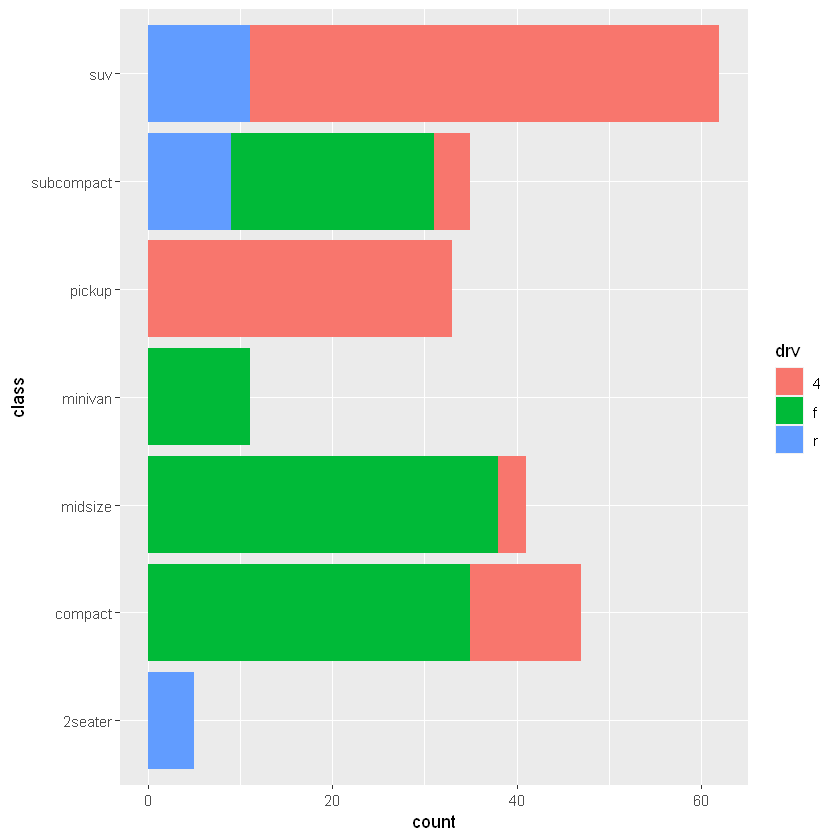

In [21]:

ggplot(data=mpg )+
  geom_bar( aes(y=class, fill  = drv))

El orden en el que aparecen las barras depende del factor  
Si se requiere  cambiar el orden de los segmentos de cada barra solo tenemos que indicarle el orden de sort a-z  o z-a

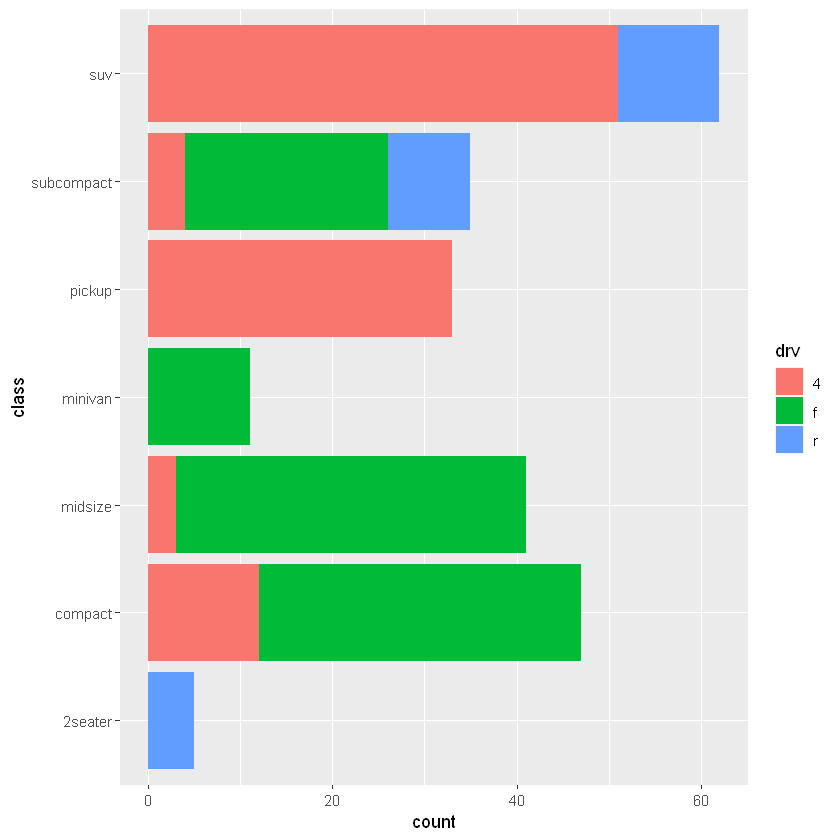

In [22]:
ggplot(mpg, aes(y=class)) +
  geom_bar(aes(fill = drv), position = position_stack(reverse = TRUE))

Note que el orden se refiere a la posición de los factores en las columnas y NO al orden que aparece en eje X o Y  
Note también que estos diagramas tienden a ser confusos porque no es claro si el valor de drv=4 va desde que termina la columna f o va desde 0  

Por defecto geom_bar usa stat_count(), es decir cuenta la cantidad de registros y eso despliega.   
Pero si deseo sumar columnas de valores de cada class, deberemos cambiar el stat stat="identity"

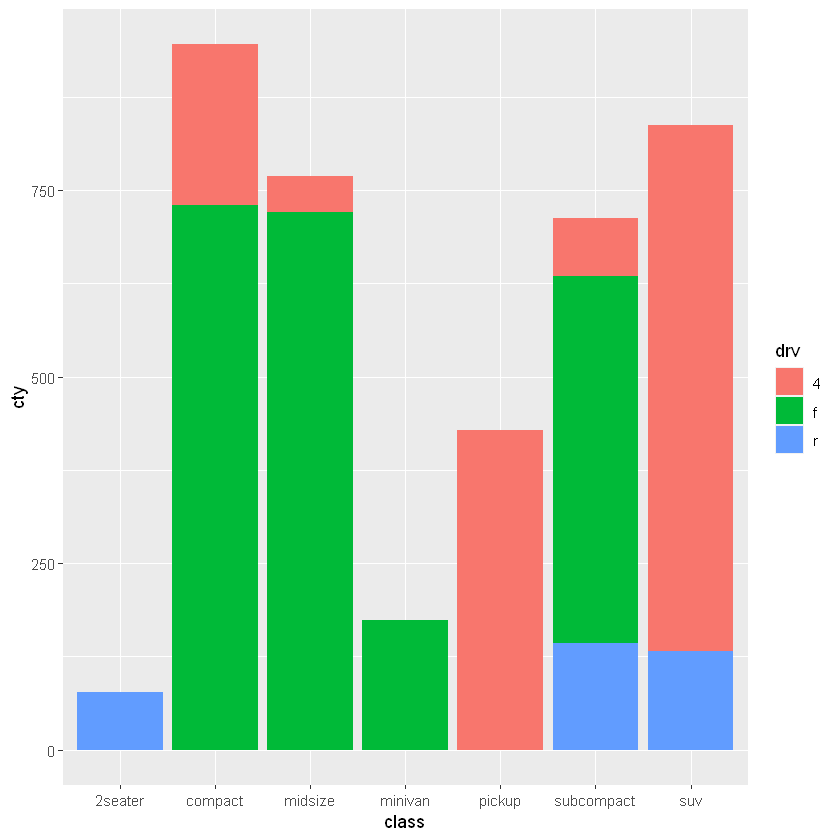

In [23]:
ggplot(data=mpg , aes(x=class ,y=cty))+
  geom_bar(aes( fill  = drv), stat="identity")

El ejercicio anterior en realidad no hace mucho sentido, porque está sumando las millas por galón
en ciudad de  todos los carros por clase, con un poco de data wrangling podemos sacar la media 
usaremos geom_col en lugar de bar porque bar nos deplegaría siempre 1.

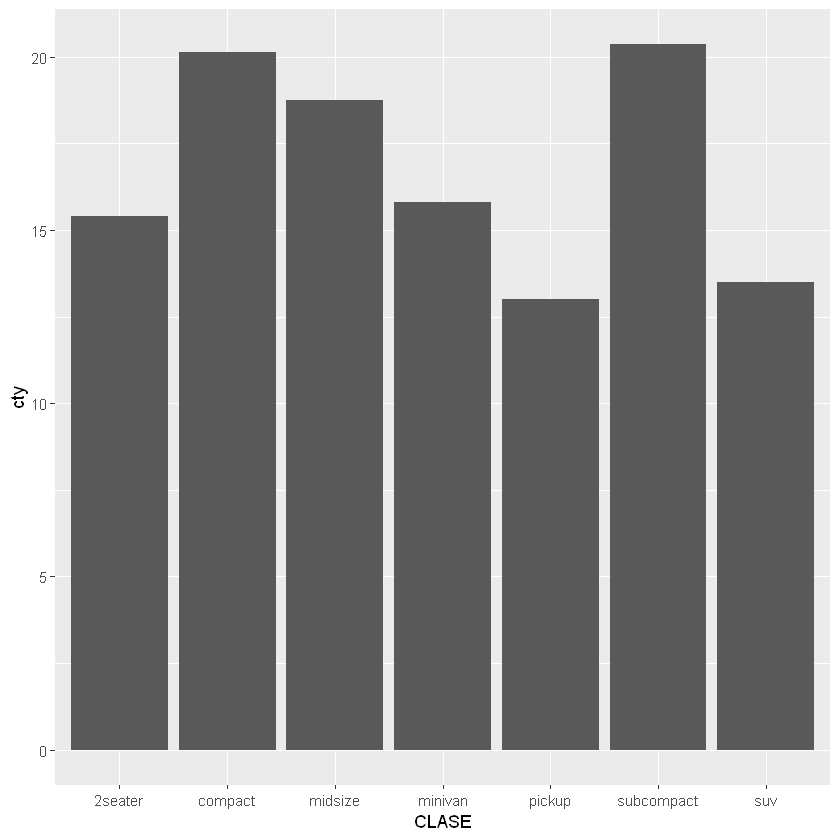

In [24]:
mpg <- as.data.frame(mpg)
mpg1 <-  aggregate(x=mpg , by=list(CLASE=mpg$class),FUN=mean)
ggplot( data=mpg1 , aes(x=CLASE, y=cty ))+
    geom_col()

geom_col es similar a geom_bar pero geom_col se utiliza más con variables  
discretas, mientras que geom_bar puede usarse con variable continuas  

Otra buena práctica es colocar el valor en el gráfico.  
Es necesario cuando los valores son importantes y/o la escala de los ejes es muy grande  
 para esto usamos geom_text. Veamos un ejemplo   

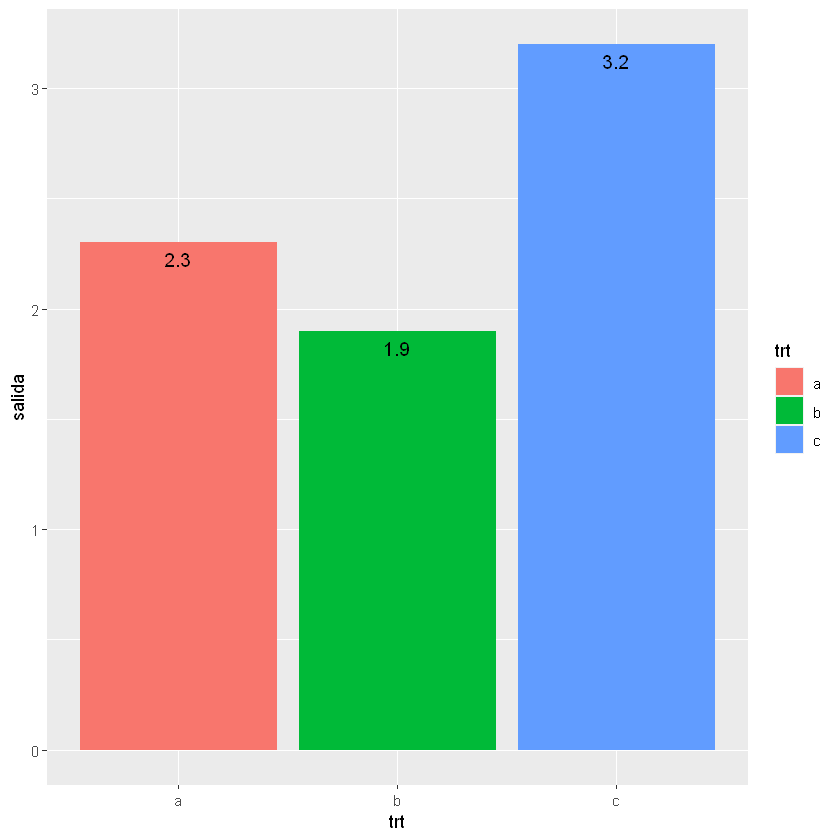

In [25]:
df <- data.frame(trt = c("a", "b", "c"), salida = c(2.3, 1.9, 3.2))
ggplot(df, aes(x=trt, y=salida, fill=trt)) +
  geom_col()+
  geom_text(aes(label=salida), vjust=1.6, color="black", size=4)

Desafortunadamente esto no se puede aplicar cuando hay varios subsets, veamos como nos saldría 

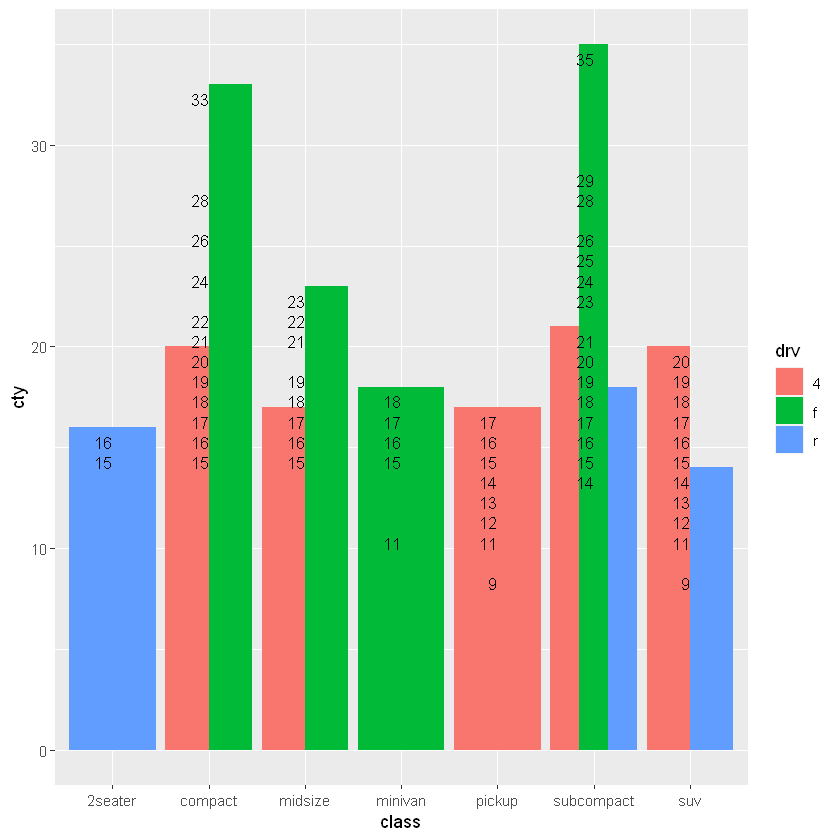

In [26]:
ggplot(data=mpg , aes(x=class ,y=cty))+ 
  geom_bar(aes( fill  = drv), stat="identity", position="dodge" ) +
  geom_text(aes(label=cty),size=3.5,hjust=1, vjust=1.6)

Esto es porque label=cty nos da un vector y no un único valor numérico  
tenemos que hacer un poco de data wrangling

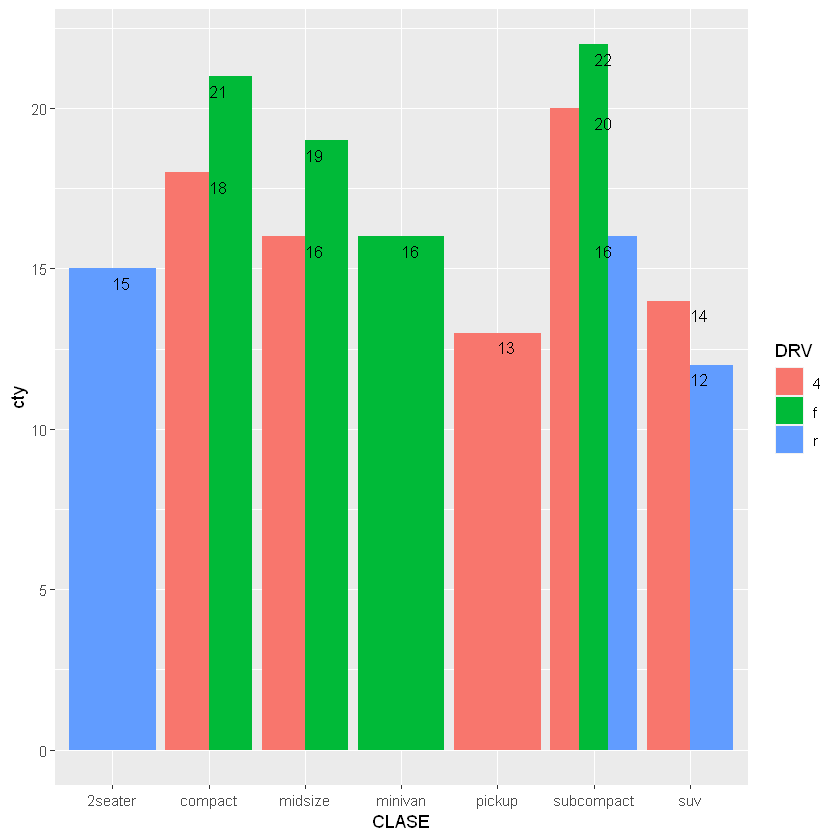

In [27]:
mpg <- as.data.frame(mpg)
mpg1 <-  aggregate(x=mpg , by=list(CLASE=mpg$class , DRV=mpg$drv),FUN=mean)
mpg1$cty <- round(mpg1$cty)
ggplot( data=mpg1 , aes(x=CLASE, y=cty, fill= DRV ))+
  geom_col(position="dodge")+
  geom_text(aes(label=cty),size=3.5,hjust=0, vjust=1.6)

Otra buena práctica es el ordenamiento
El orden que aparecen las columnas esta dado por el orden natural del factor por 
el cual se agrupó. Pero como hemos visto, siempre agrupamos de mayor a menor para 
ser  consistentes con la Gestalt y los patrones de visualización 
En este caso necesitamos un preprocesamiento  ya que ggplot no lo hace 
Veamos con mpg para contar registros 

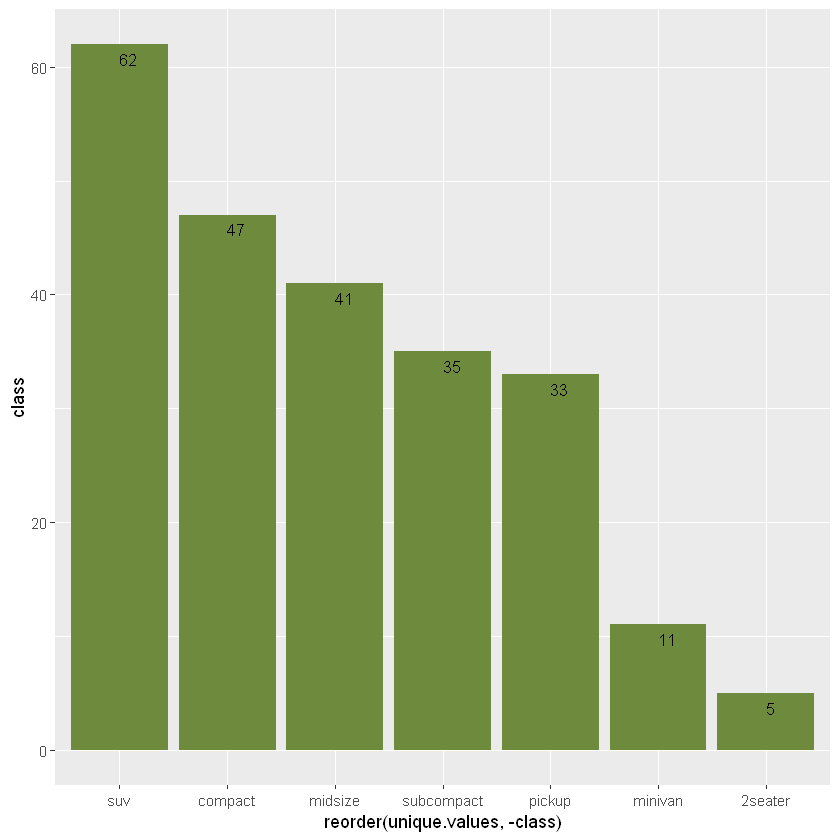

In [28]:
mpg1 <-  aggregate(x=mpg , by=list(unique.values=mpg$class),FUN=length)
ggplot(mpg1, aes(x = reorder(unique.values, -class), y = class)) + 
  geom_bar(stat = "identity" , fill="darkolivegreen4")+
  geom_text(aes(label=class),size=3.5,hjust=0, vjust=1.6)

El signo menos (-) en la función reorder indica que ordene de acuerdo a class en forma descendente  
sin el signo menos (-) seria ascendente  
  
Otro tema intereante es el resaltar  un dato en especial 
  


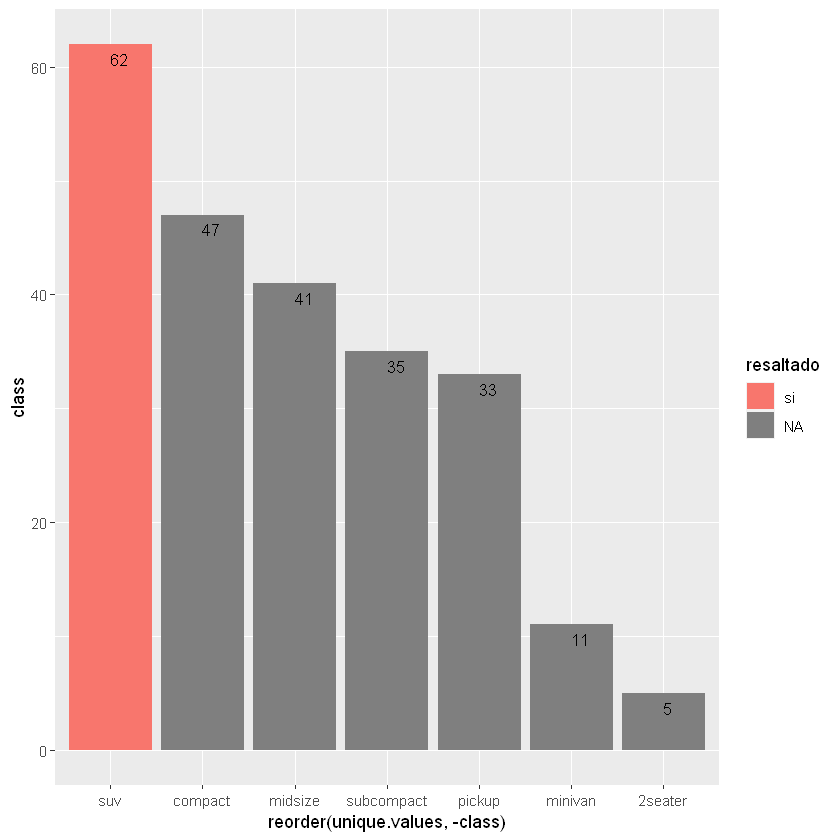

In [29]:
mpg1 <-  aggregate(x=mpg , by=list(unique.values=mpg$class),FUN=length)
mpg1$resaltado <- NA
mpg1[mpg1$unique.values=="suv" ,]$resaltado="si"
ggplot(mpg1, aes(x = reorder(unique.values, -class), y = class, fill=resaltado)) + 
  geom_bar(stat = "identity")+
  geom_text(aes(label=class),size=3.5,hjust=0, vjust=1.6)

Por último no se olvide de poner los títulos correspondientes

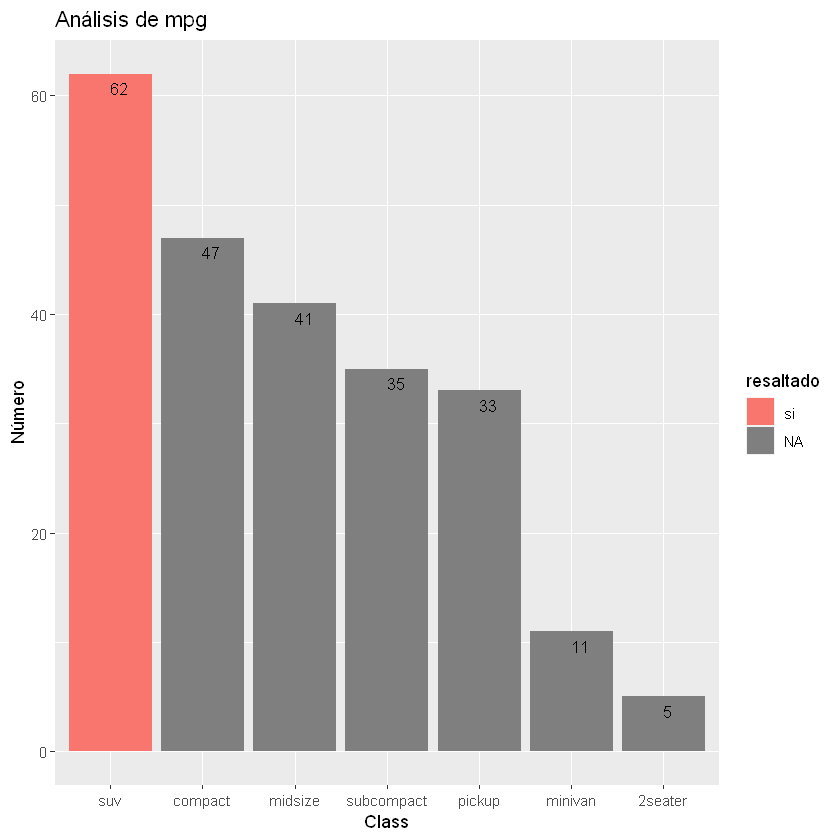

In [30]:
ggplot(mpg1, aes(x = reorder(unique.values, -class), y = class, fill=resaltado)) + 
  geom_bar(stat = "identity") + 
  geom_text(aes(label=class),size=3.5,hjust=0, vjust=1.6)+
  ggtitle("Análisis de mpg ")+
  xlab("Class") + ylab("Número")

<a id='Dispersion'></a>
## DIAGRAMAS DE DISPERSIÓN X Y  (SCATTER PLOT) 
El diagrama de dispersión grafica pares de datos numéricos, con una variable en cada eje, para buscar una relación entre ellos.

El diagrama nos permitirá unir los puntos mediante una línea para ver tendencias o relaciones 

### Cuando usar este tipo de diagrama:
Cuando haya  datos numéricos emparejados
Cuando su variable de respuesta puede tener múltiples valores para cada valor de su variable predictoras
Al intentar determinar si las dos variables est?n relacionadas, como por ejemplo:
Al intentar identificar las posibles causas raíz de los problemas
Al determinar si dos efectos que parecen estar relacionados ambos ocurren con la misma causa
Al probar la autocorrelación antes de construir un gráfico de control 

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

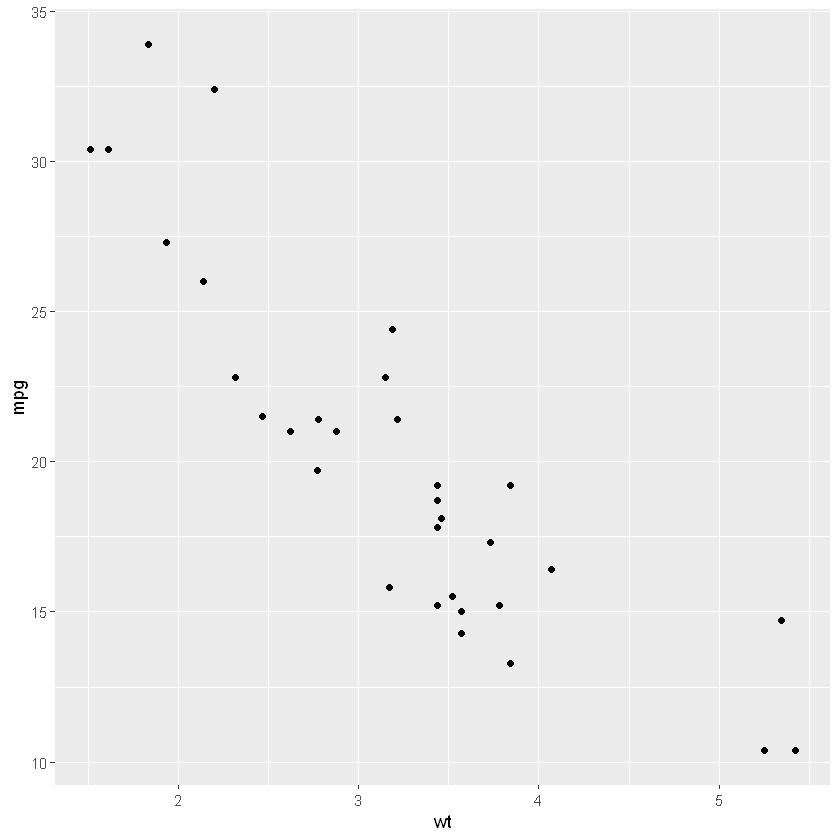

In [31]:
data(mtcars)
names(mtcars)

ggplot(mtcars, aes(wt, mpg)) +
  geom_point()


geom_point entiende los siguientes  aes:  
x y alpha colour fill group shape size stroke

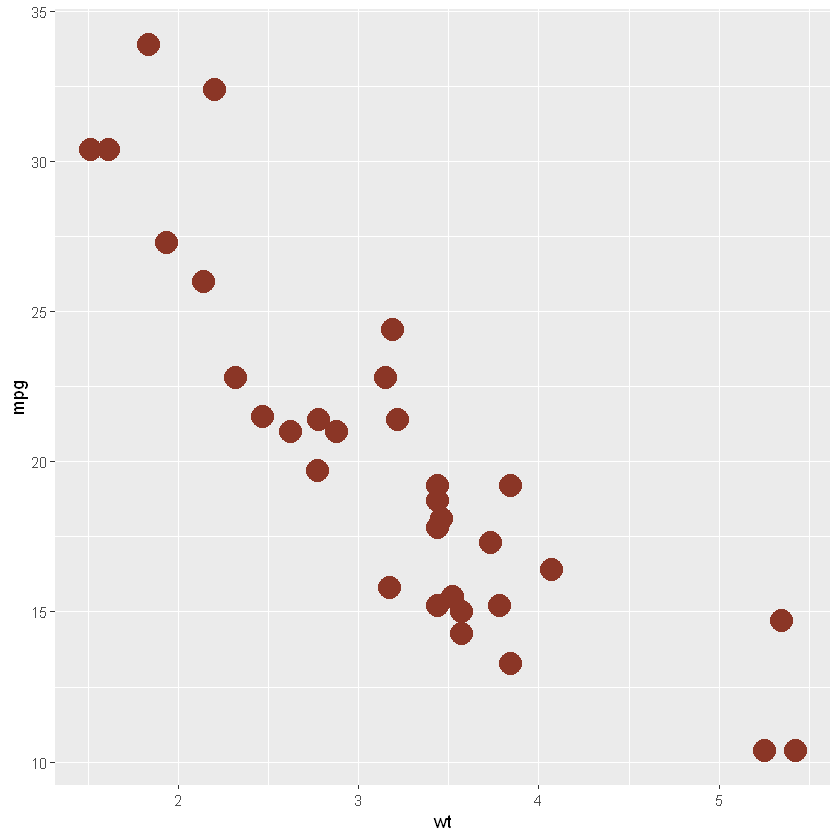

In [32]:
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point(colour = "tomato4", size =6)

Podemos definir color basado en un factor 

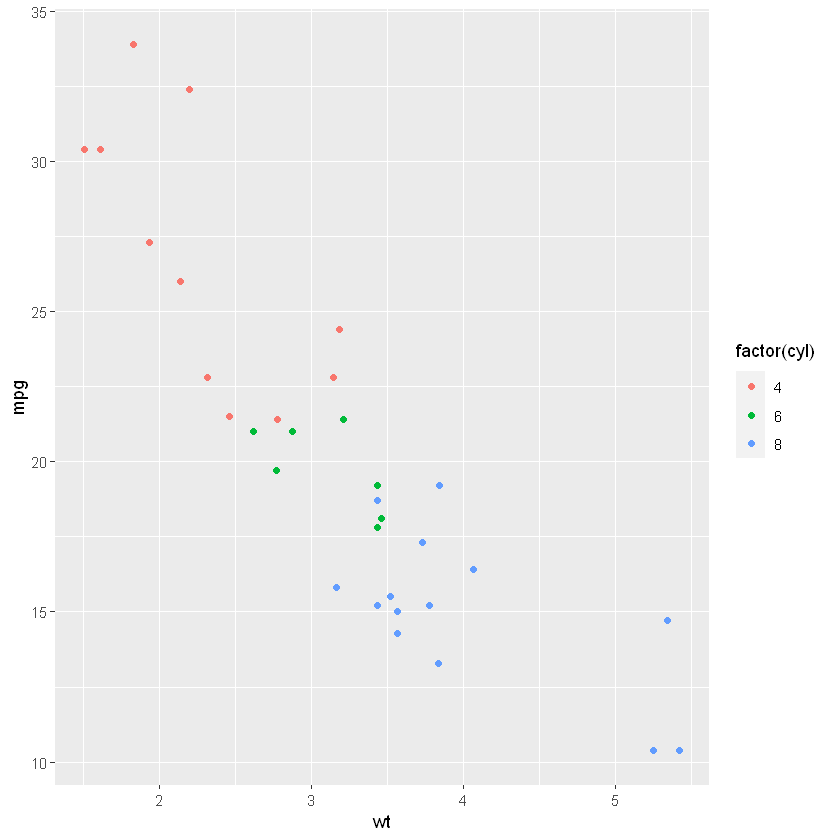

In [33]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(aes(colour = factor(cyl))) 

Podemos definir forma basado en un factor 

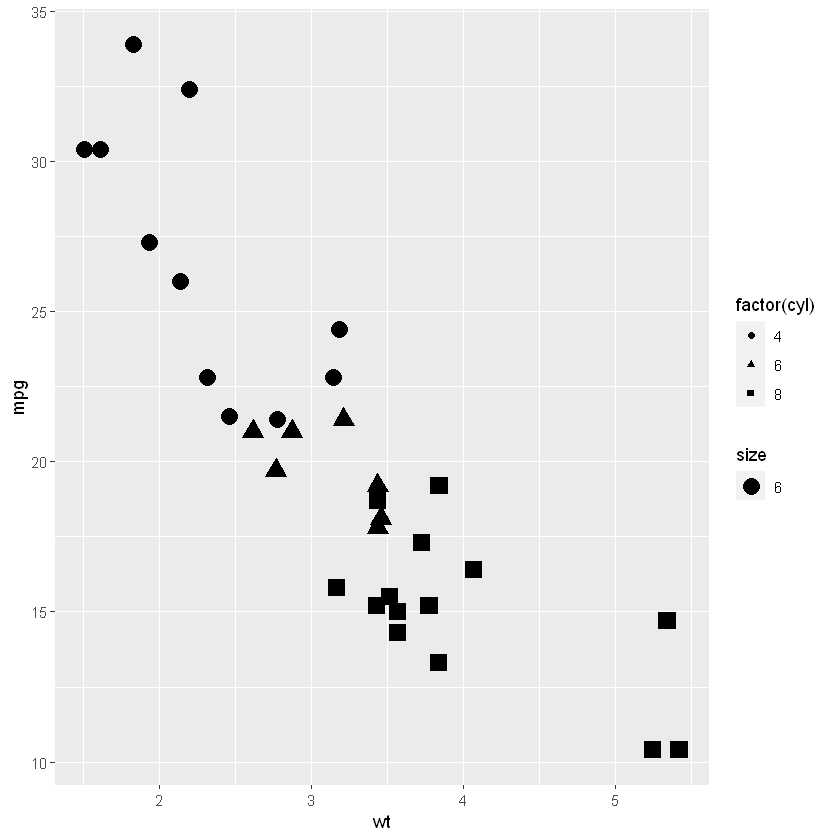

In [34]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(aes(shape = factor(cyl),size=6))

O basado en un color o ambos 

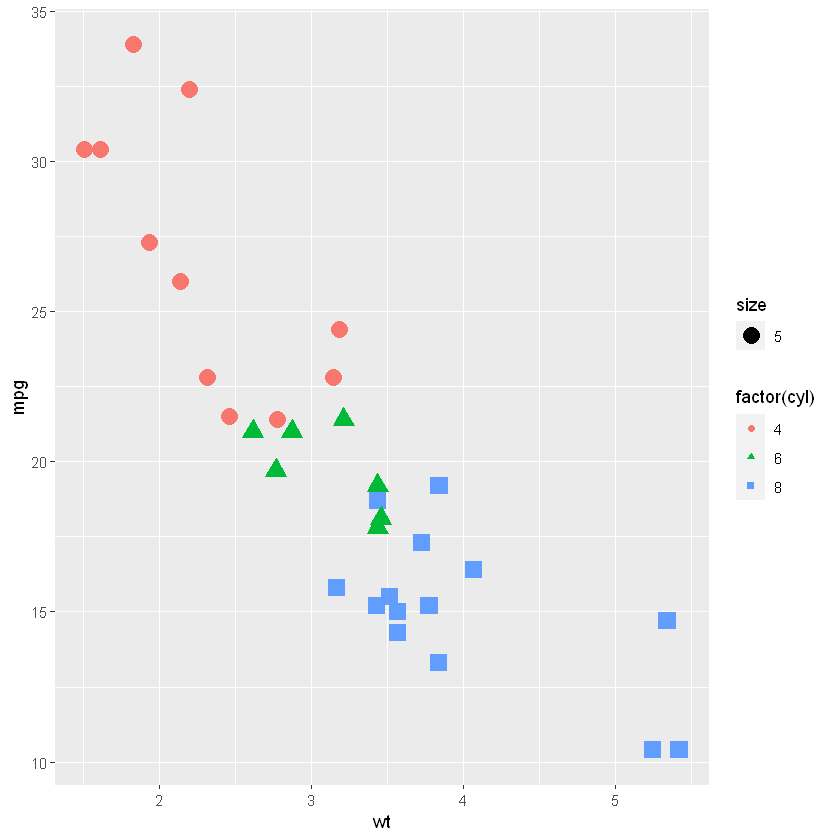

In [35]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(aes(shape = factor(cyl), colour=factor(cyl),size=5))


Usando aes  size se puede crear un diagrama de burbuja con el mismo geom

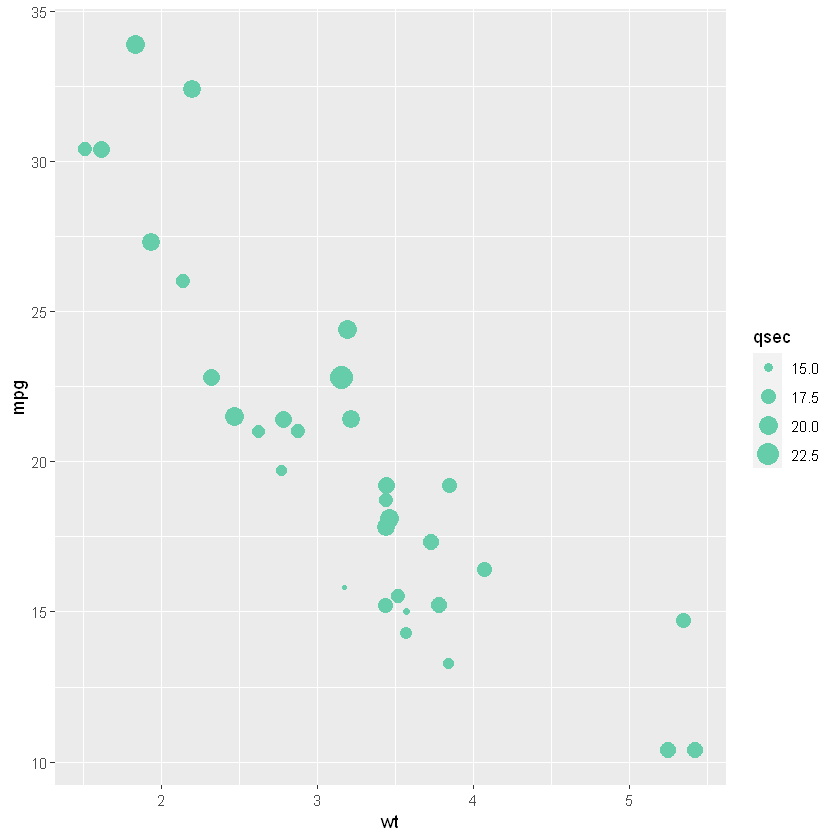

In [36]:
ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point(aes( size = qsec), colour="aquamarine3")


La variación de alpha es útil para dataset muy grandes porque permite ver puntos que están por detrás

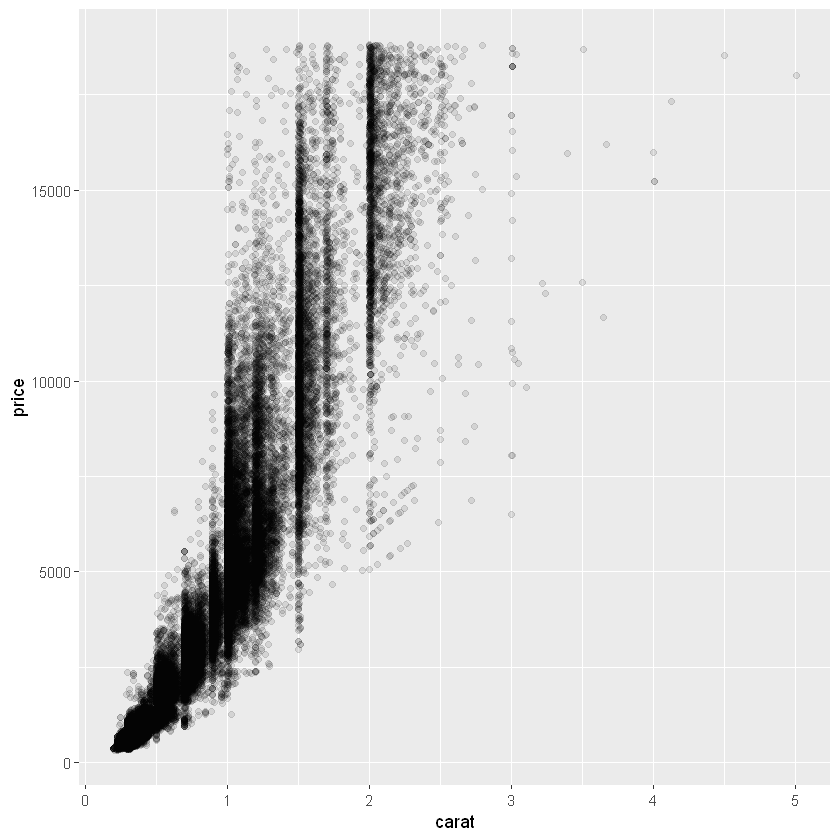

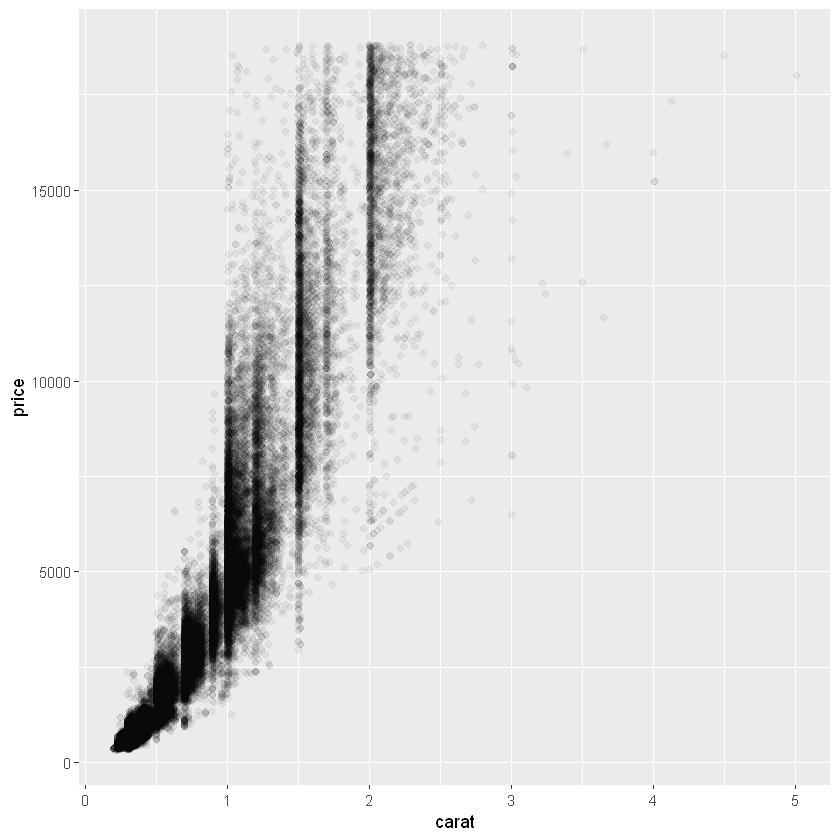

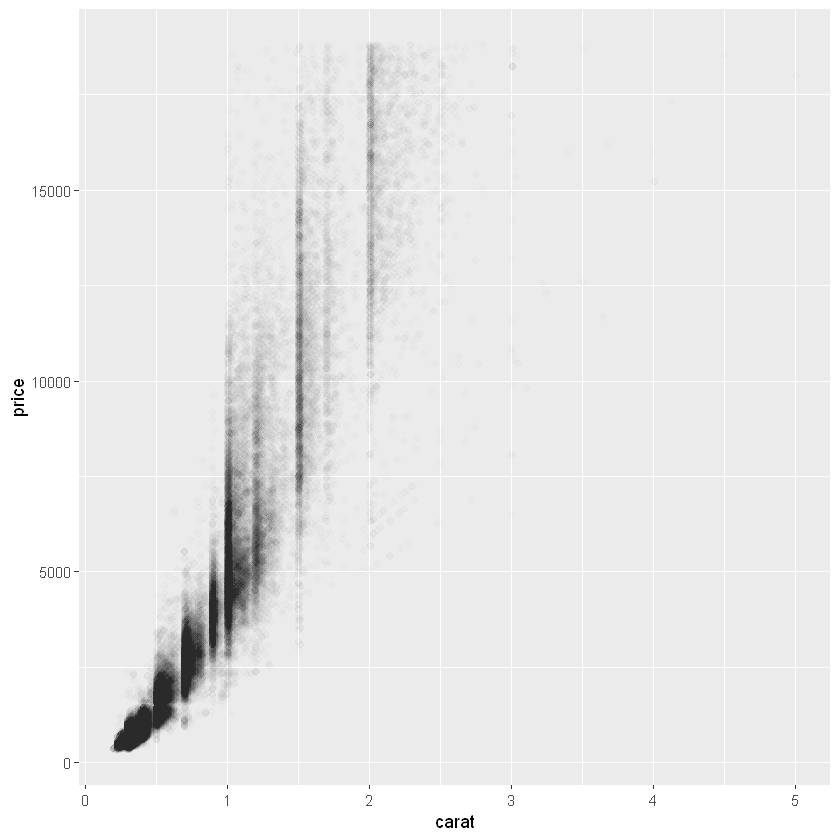

In [37]:
data(diamonds)

ggplot(diamonds, aes(carat, price)) +
  geom_point(alpha = 1/10) 

ggplot(diamonds, aes(carat, price)) +
  geom_point(alpha = 1/20) 

ggplot(diamonds, aes(carat, price)) +
  geom_point(alpha = 1/100)


Para formas que tienen un borde que tiene forma de donut
se puede colorear el interior y exterior en forma separada.
se puede usar stroke para definir el tamaño  de la línea . 

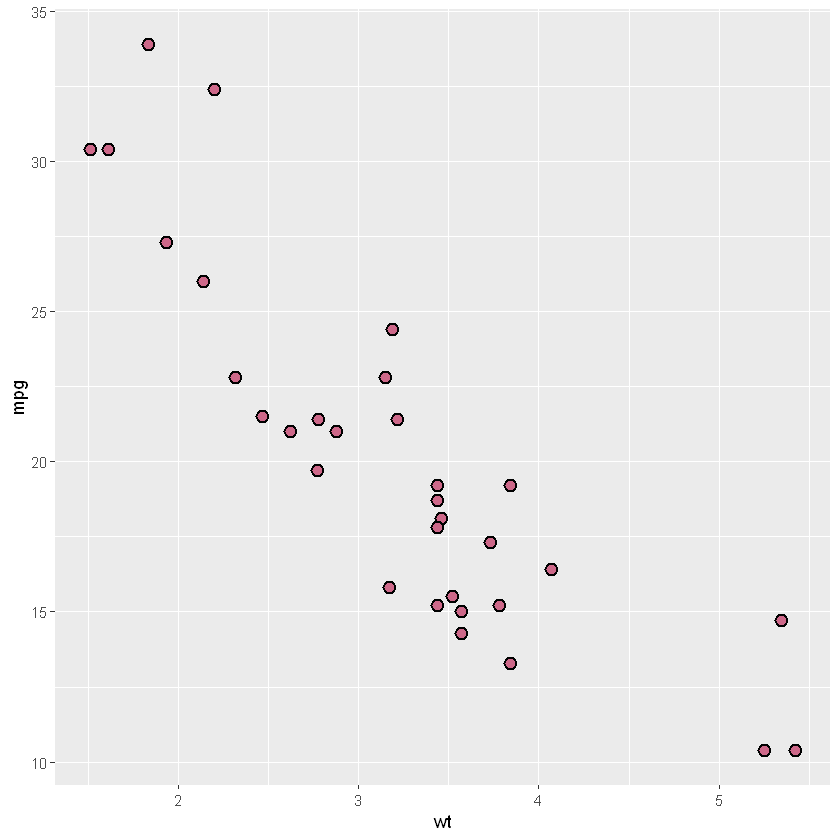

In [39]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(shape = 21, colour = "black", fill = "palevioletred3", size = 3, stroke = 1)

Se pueden crear  figuras interesantes usando varias capas de geom_point

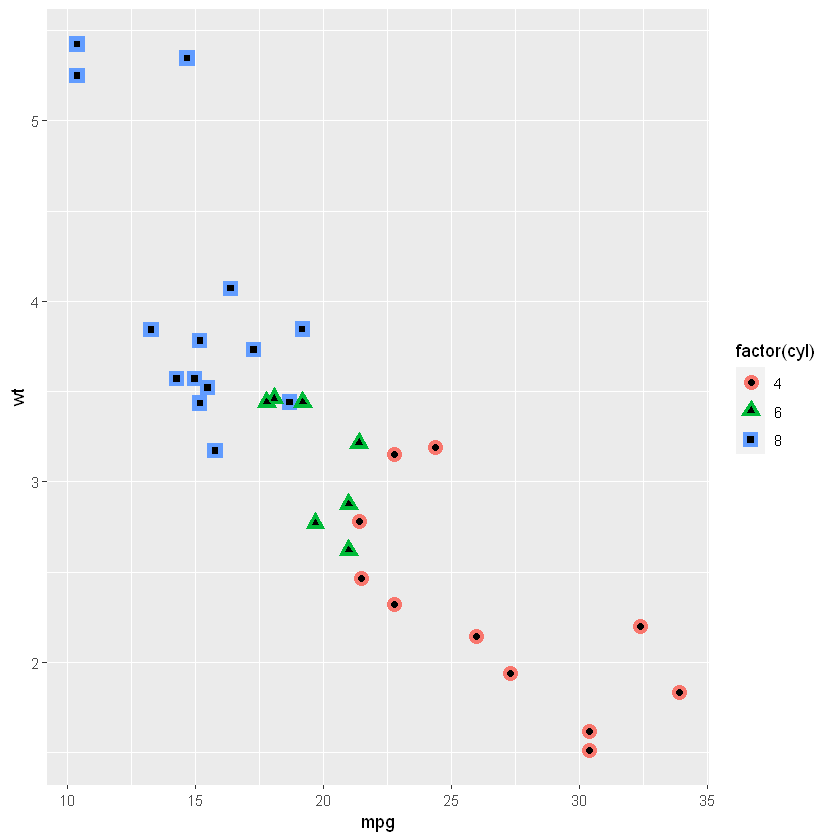

In [40]:

ggplot(mtcars, aes(mpg, wt, shape = factor(cyl))) +
  geom_point(aes(colour = factor(cyl)), size = 4) +
  geom_point(colour = "black", size = 1.5) 

lo que quiere decir que el punto debe ser color  (casi negro) de tamaño 1.5
pero el contorno depende del factor y tiene tamaño 4
Se pueden lograr muchas combinaciones de estos argumentos, pero no hay que abusar porque el 
diagrama se vuelve dificil de digerir 

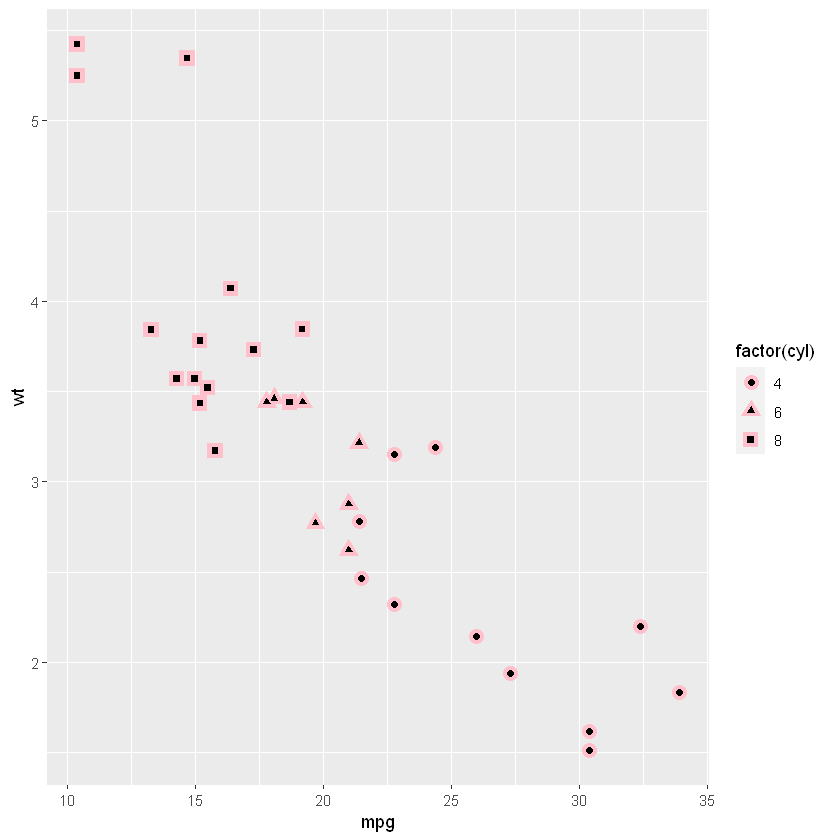

In [41]:
ggplot(mtcars, aes(mpg, wt, shape = factor(cyl))) +
  geom_point(colour = "pink", size = 4) + geom_point(aes(shape = factor(cyl)))

Una limitación importante de las barras es que deben comenzar en cero, de modo que la longitud de la barra sea proporcional a la cantidad mostrada.  
Para algunos conjuntos de datos, esto puede ser poco práctico.  
En este caso, podemos indicar cantidades colocando puntos en las ubicaciones apropiadas a lo largo de ejes x o y  y limitando el área de despliegue 

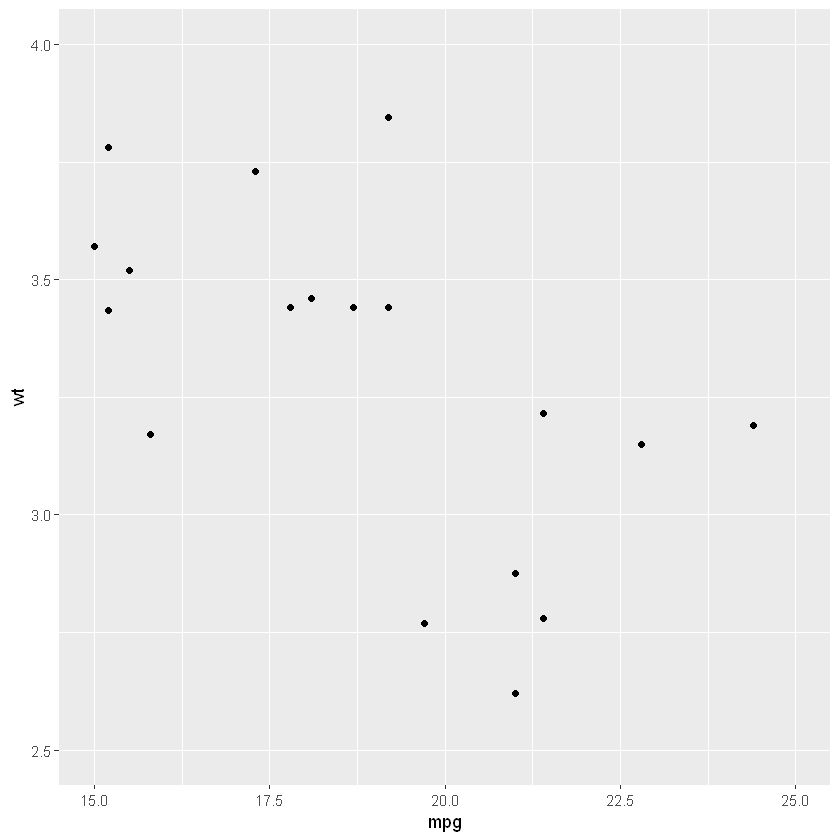

In [42]:
ggplot(mtcars, aes(x=mpg, y=wt)) +
  geom_point() +
  xlim(15, 25) + ylim(2.5,4)

Cuando los puntos se sobreponen es difícil  apreciar  cuantos puntos hay  
recurrimos a geom_jitter  
geom_jitter introduce una variación en los valores de forma aleatoria de tal manera de que se pueda visualizar  adecuadamente 

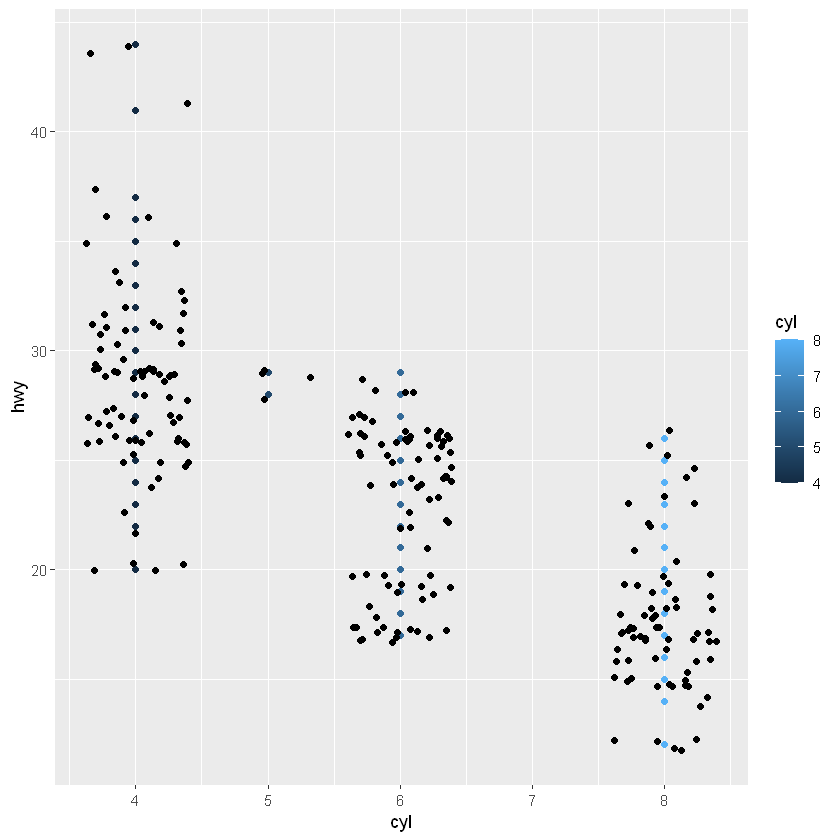

In [43]:
data(mpg)
ggplot(mpg, aes(x=cyl, y=hwy)) +
  geom_point(aes(colour=cyl) )+
  geom_jitter()

Eventualmente necesitamos unir los puntos mediante una línea 

creando nuevas columnas

In [44]:
data(economics)
economics$año <- year(economics$date)
economics$mes <- month(economics$date, label=TRUE)
economics
class(economics)

date,pce,pop,psavert,uempmed,unemploy,año,mes
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1967-07-01,506.7,198712,12.6,4.5,2944,1967,Jul
1967-08-01,509.8,198911,12.6,4.7,2945,1967,Aug
1967-09-01,515.6,199113,11.9,4.6,2958,1967,Sep
1967-10-01,512.2,199311,12.9,4.9,3143,1967,Oct
1967-11-01,517.4,199498,12.8,4.7,3066,1967,Nov
1967-12-01,525.1,199657,11.8,4.8,3018,1967,Dec
1968-01-01,530.9,199808,11.7,5.1,2878,1968,Jan
1968-02-01,533.6,199920,12.3,4.5,3001,1968,Feb
1968-03-01,544.3,200056,11.7,4.1,2877,1968,Mar


[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

podemos crear un filtro a la data para hacerla más visible  
en este caso todos los registros mayores que año 2000

In [45]:
econ2000 <- economics[which(economics$año >2000),]

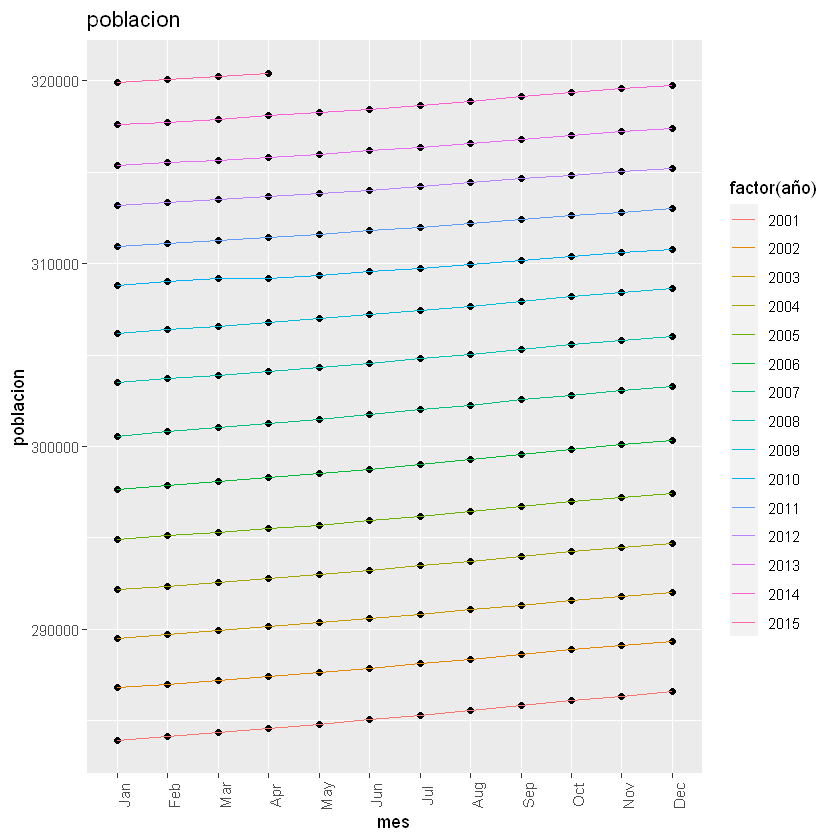

In [46]:
graf3 <-ggplot(econ2000, aes(x=mes,y=pop)) + geom_point()+ 
  geom_line(aes(color=factor(año), group=año)) +
  scale_color_discrete()  +
  labs(title="poblacion", x= "mes", y="poblacion")+
  theme(axis.text.x=element_text(angle=90, vjust=1))
graf3

<a id='Proporciones'></a>
### VISUALIZACION DE PROPORCIONES 
* [DIAGRAMAS PASTEL Y COORDENADAS POLARES](#Pasteles)
* [MOSAICOS](#Mosaicos) 
* [TREEMAPS](#Treemaps)
* [PARALEL SETS](#Paralel)

A menudo queremos mostrar cómo algón grupo, entidad o cantidad se descompone en partes individuales que representan cada una  proporción del todo.  
Los ejemplos comunes incluyen las proporciones de hombres y mujeres en un grupo de personas, los porcentajes de personas que votan por diferentes partidos políticos, etc.

La visualización es el gráfico típico de pastel, aunque no es muy usado en  la ciencia de datos.  
Visualizar proporciones puede ser un desafío, en particular cuando el todo se divide en muchas partes diferentes o cuando queremos ver cambios en las proporciones a lo  largo del tiempo o entre condiciones.  
No existe una visualización ideal única que siempre funcione. 

In [47]:
install.packages('ggmosaic')

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggmosaic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


In [48]:
install.packages('reshape2')

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


In [49]:
install.packages('ggforce')

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggforce' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


In [50]:
install.packages('treemapify')

Installing package into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'treemapify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


In [125]:
#importar pie3D y ver que pasa con totales
rm(list=ls())
require(ggplot2)
#require(hrbrthemes)
require(dplyr)
require(tidyr)
require(viridis)
require(ggmosaic)
require(treemap)
require(pie3D)
require(tidyverse)
require(ggfittext)
require(treemapify)
require(plotrix)
require(ggforce)
require(reshape2)


Loading required package: viridis

Loading required package: treemap

Loading required package: pie3D

Loading required package: plotrix



In [112]:
data(midwest)
names(midwest)
totales=data.frame( totalpop =NA,state=NA)
for (st in unique(midwest$state))
{
statedf <- midwest %>%   filter(state == st) %>%  summarise( sum(poptotal))
statedf$state <- st
names(statedf)<-c("totalpop", "state")
totales <-rbind(totales ,statedf)
} 
totales<- na.omit(totales)
totales$totalpop <- round(totales$totalpop/1000000, 2) # en millones 
View(totales)

[1] "PID"                  "county"               "state"               
 [4] "area"                 "poptotal"             "popdensity"          
 [7] "popwhite"             "popblack"             "popamerindian"       
[10] "popasian"             "popother"             "percwhite"           
[13] "percblack"            "percamerindan"        "percasian"           
[16] "percother"            "popadults"            "perchsd"             
[19] "percollege"           "percprof"             "poppovertyknown"     
[22] "percpovertyknown"     "percbelowpoverty"     "percchildbelowpovert"
[25] "percadultpoverty"     "percelderlypoverty"   "inmetro"             
[28] "category"

,totalpop,state
,<dbl>,<chr>
2,11.43,IL
3,5.54,IN
4,9.30,MI
5,10.85,OH
6,4.89,WI


<a id='Pasteles'></a>
### Pasteles y Coordenadas Polares
En coordenadas polares tenemos 2 variables que pueden ser mapeadas al dataset . El radio r y el ángulo theta.
Si:
* El ángulo theta esta mapeado a la variable numérica, y;
* No existe otro valor 

el gráfico se convierte en un pastel clásico

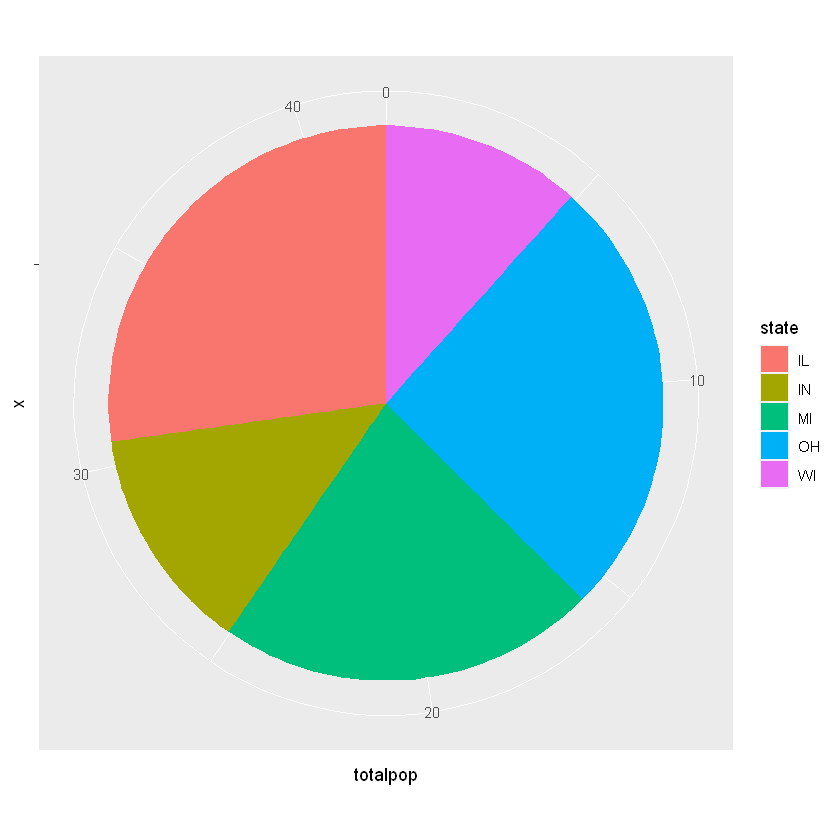

In [113]:
ggplot(data=totales , aes(x="", y=totalpop , fill=state))+
  geom_bar(stat="identity") +coord_polar(theta="y", start=0)

Note el uso de geom_bar

Si existen 2 variables; una categórica y otra numérica, donde el theta esta mapeado al valor numérico y el radio a la categórica obtenemos un gráfico tipo blanco (target), entonces cada categórica tiene un radio definido, y los círculos podrían no ser completos.

Note los valores referenciales de la escala , 0,3,6,9 y compare con el dataset

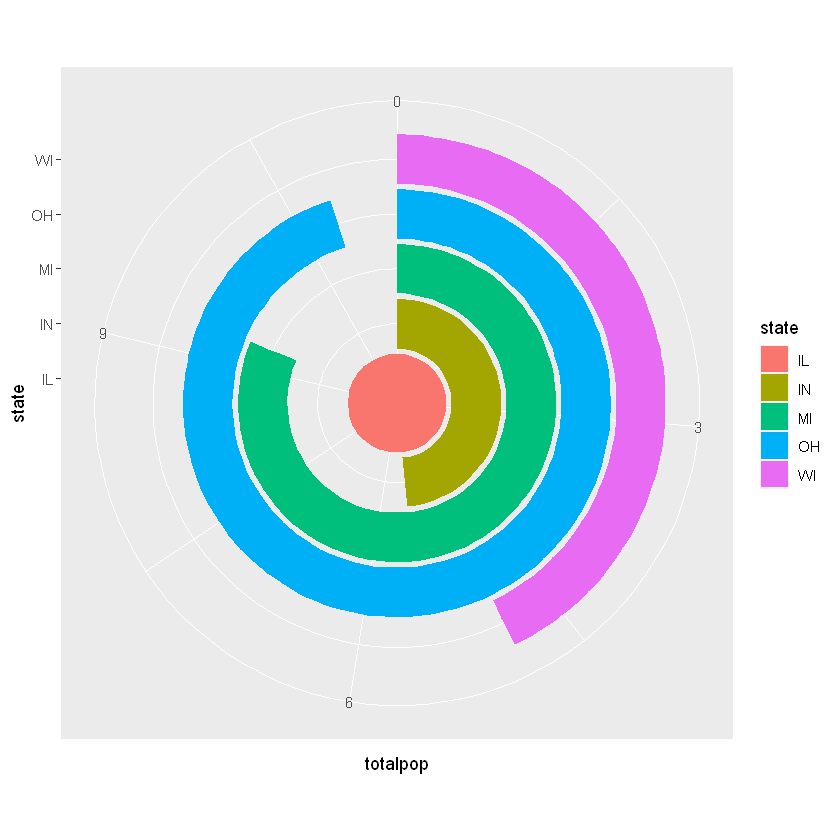

In [114]:
ggplot(data=totales , aes(x=state, y=totalpop , fill=state))+
  geom_bar(stat="identity") +coord_polar(theta="y", start=0)

si no se especifica cual mapea a theta entonces el radio es mapeado a la numérica y el ángulo es constante .

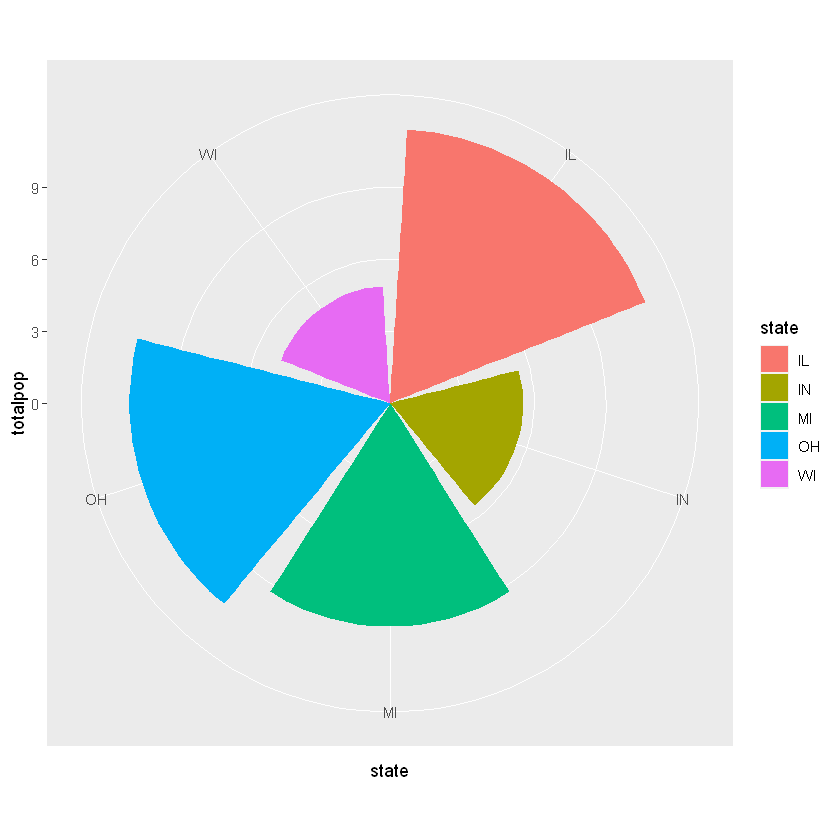

In [115]:
ggplot(data=totales , aes(x=state, y=totalpop , fill=state))+
  geom_bar(stat="identity") +coord_polar( start=0)

Si no hay una segunda variable se obtendrá un blanco completo, en ese caso el radio es mapeado a la variable numérica, pero cada factor se suma al anterior

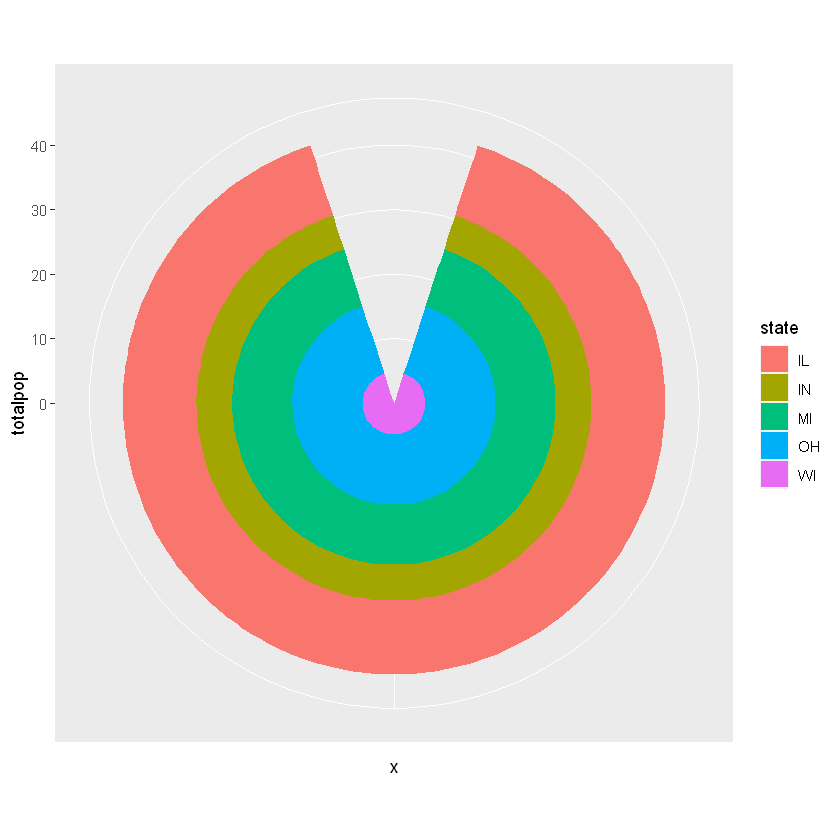

In [116]:
ggplot(data=totales , aes(x="", y=totalpop , fill=state))+
  geom_bar(stat="identity") +coord_polar( start=0)

### Gráficos 3D
ggplot no contiene librerías para diagramas 3D, pero se hace usando la librería **plotrix**

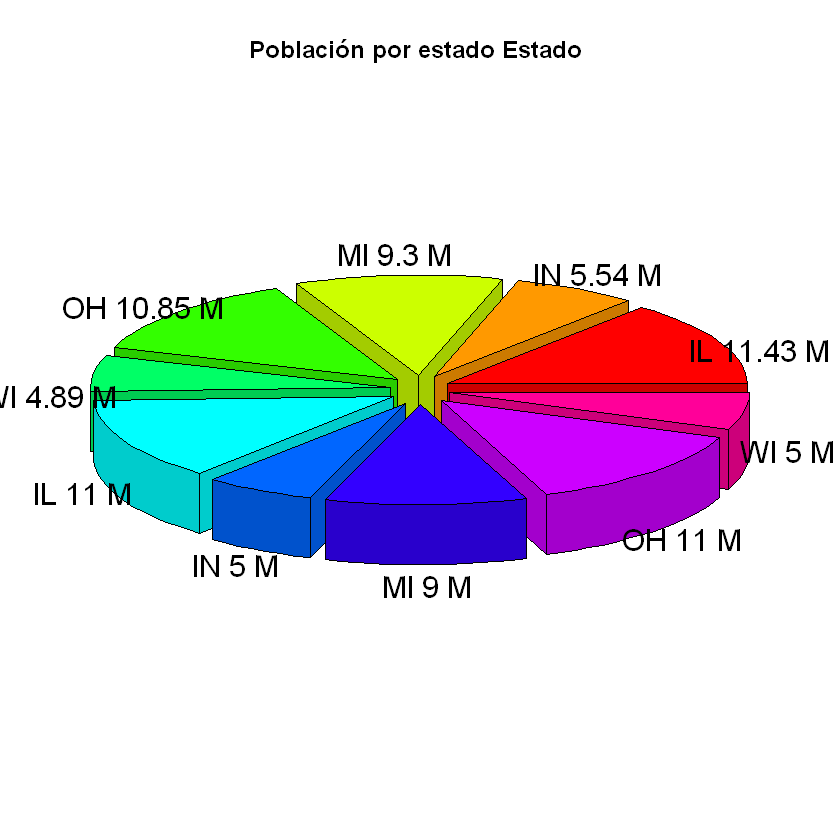

In [138]:
require(plotrix)
slices <- totales$totalpop
lbls <- paste(totales$state, as.character(totales$totalpop), "M")
pie3D(slices,labels=lbls,explode=0.1, main="Población por estado Estado ")

Los gráficos circulares tienen un caso de uso bastante reducido que se resume particularmente bien en su definición. 

El objetivo principal en un gráfico circular, debe ser el comparar la contribución de cada grupo al todo, en lugar de comparar grupos.

Como ejemplo vamos a crear una nueva columna alterando +- 10% el valor de la población

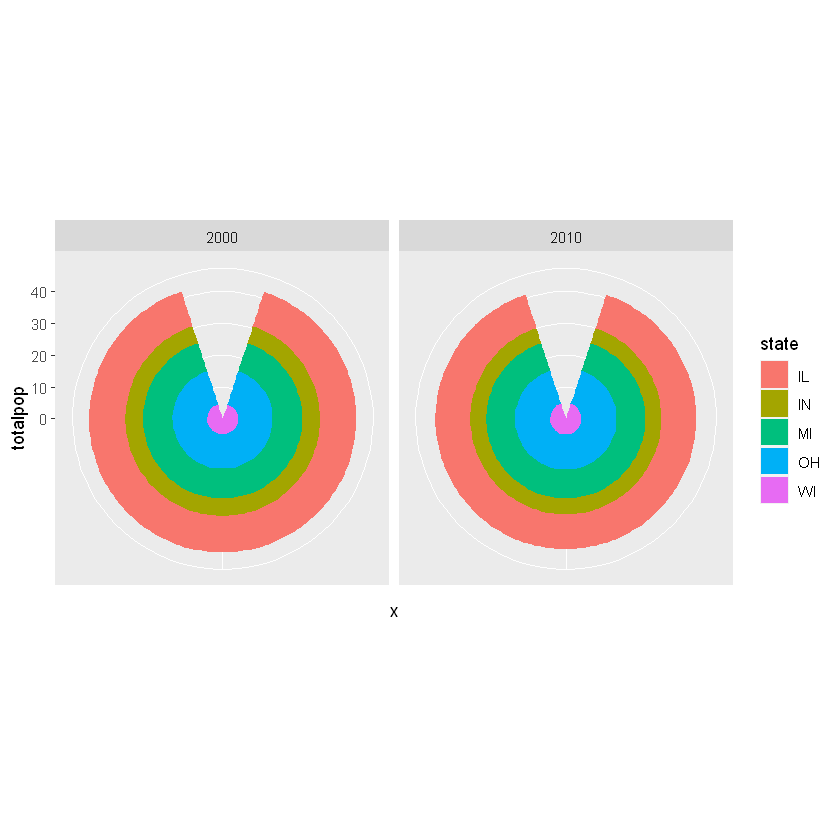

In [133]:
totales$year <- "2000" 
for (st in totales$state)
{
  
  val <- totales[totales$state==st ,1]
  valmin<- val*.9
  valmax<- val*1.1
  val1 <- runif(1,valmin, valmax )
  df2010 <- data.frame(totalpop=round(val1) ,state=st, year="2010" )
  totales<-rbind(totales,df2010)
}

ggplot(data=totales , aes(x="", y=totalpop , fill=state))+
  geom_bar(stat="identity") +coord_polar( start=0)+
  facet_wrap(vars(year))

En el ejemplo anterior tenemos 2 gráficos similares, de hecho, existen diferencias de +- 10% y resulta muy difícil su comparación

<a id='Mosaicos'></a>
### MOSAICOS 
Diseñado para crear visualizaciones de datos categóricos, geom_mosaic() tiene la capacidad de producir gráficos de barras, gráficos de barras apiladas, diagramas de mosaico y diagramas de dos pisos y por lo tanto, ofrece una amplia gama de diagramas potenciales.  

Para usar ggmosaic dentro del marco de ggplot2, debemos ser capaces de crear la fórmula a partir de la estética (aes) definida. Es decir, la estética configura la fórmula que determina cómo romper la distribución conjunta.  

La principal diferencia de geom_mosaic es que los gráficos de mosaico no tienen un mapeo uno a uno entre una variable y el eje X o Y.  

Para acomodar el número variable de variables, la función product() crea el mapeo a X. 

In [67]:
library('ggplot2')

In [68]:
data(Titanic)
titanic <- as.data.frame(Titanic)
titanic$Survived <- factor(titanic$Survived, levels=c("Yes", "No"))  #solo cambiamos a clase factor
head(titanic)
xlabel=paste("1st  ", "    2nd    " , "    3rd  " , "  Crew")
View(Titanic)

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


, , Age = Child, Survived = No

      Sex
Class  Male Female
  1st     0      0
  2nd     0      0
  3rd    35     17
  Crew    0      0

, , Age = Adult, Survived = No

      Sex
Class  Male Female
  1st   118      4
  2nd   154     13
  3rd   387     89
  Crew  670      3

, , Age = Child, Survived = Yes

      Sex
Class  Male Female
  1st     5      1
  2nd    11     13
  3rd    13     14
  Crew    0      0

, , Age = Adult, Survived = Yes

      Sex
Class  Male Female
  1st    57    140
  2nd    14     80
  3rd    75     76
  Crew  192     20


Product es una función para crear una lista que indica como debe  desglosar las partes, en este caso por Clase (1ra, 2da, 3ra,Crew) y el segundo factor si sobrevivió  

Note que mosaic no dibuja valores en 0   

También note que mosaic no usa el argumento y, en su lugar habrá que usar weight y este mapea al área

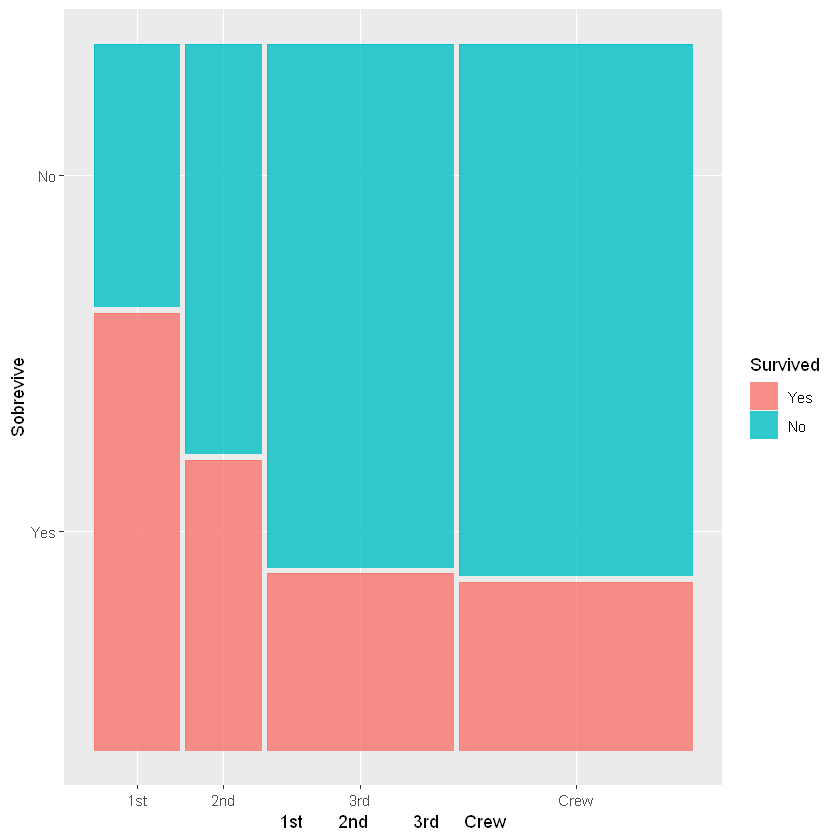

In [69]:
p1 <- ggplot(data=titanic) +
  geom_mosaic(aes(weight=Freq, x=product(Class), fill=Survived))+
  xlab(xlabel) +
  ylab("Sobrevive")
p1


Como es dificil comparar áreas es recomendable colocar el valor correspondiente a cada área, aunque  el proceso puede parecer  un tanto complicado ya que se requiere manipular el objeto mismo (p1 en este caso) 

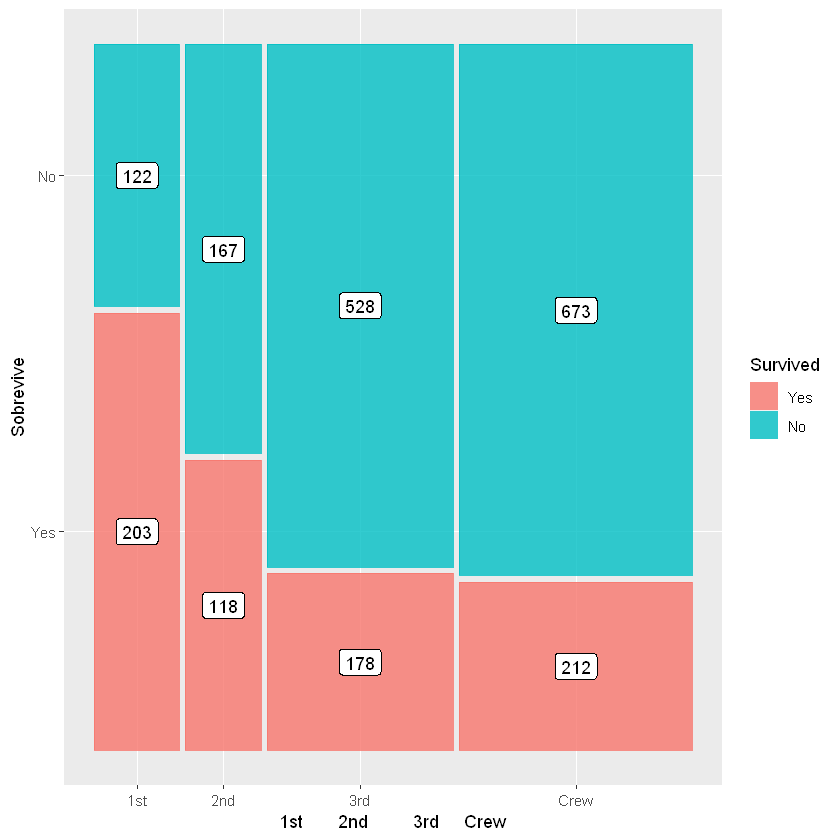

In [70]:
p1d<- ggplot_build(p1)$data %>% as.data.frame() %>% filter(.wt > 0)
p2<-p1 + 
  geom_label(data = p1d, aes(x = (xmin + xmax)/2, y = (ymin + ymax)/2,  label = .n))
p2

Podemos validar el gráfico con un aggregate de la data

In [71]:
aggregate(data=titanic , .~Class+Survived ,sum)

Class,Survived,Sex,Age,Freq
<fct>,<fct>,<dbl>,<dbl>,<dbl>
1st,Yes,6,6,203
2nd,Yes,6,6,118
3rd,Yes,6,6,178
Crew,Yes,6,6,212
1st,No,6,6,122
2nd,No,6,6,167
3rd,No,6,6,528
Crew,No,6,6,673


Veamos el siguiente gráfico con 2 variables categóricas

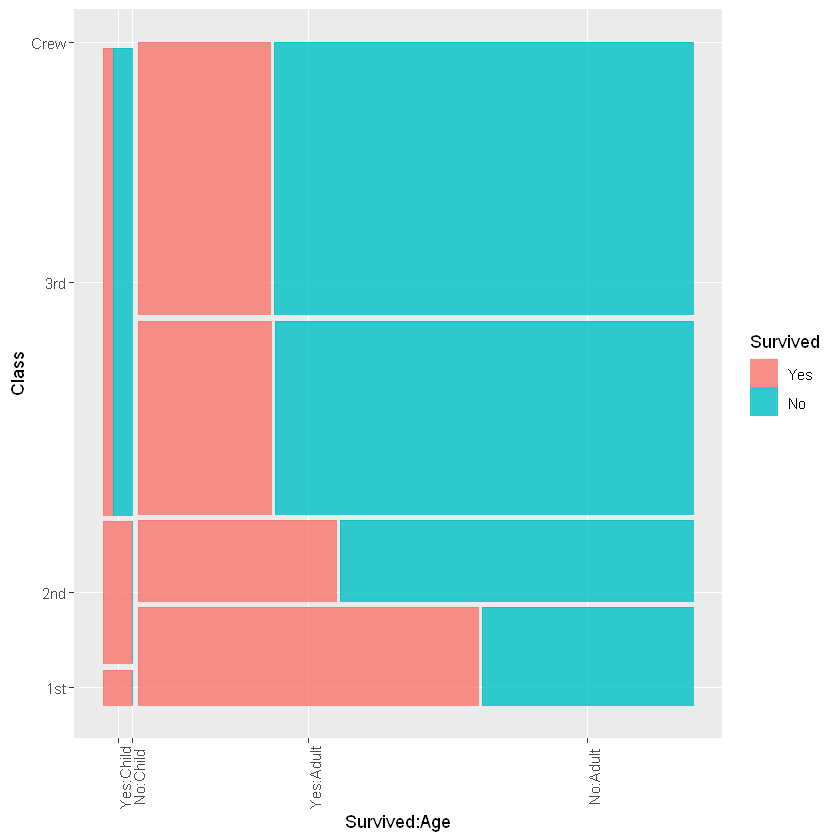

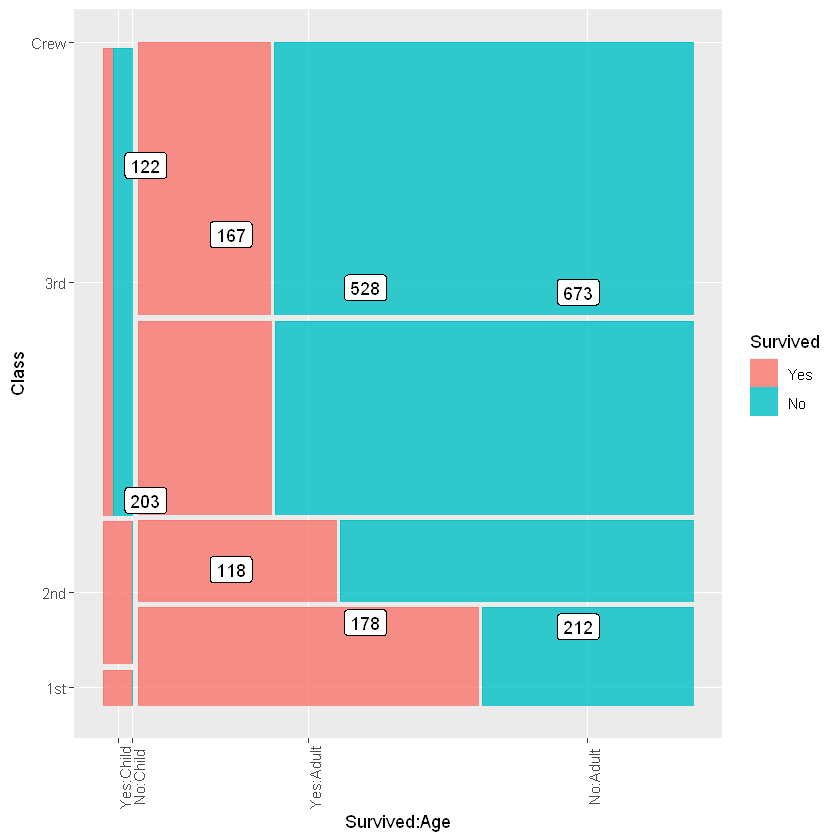

In [72]:
p3 <- ggplot(data=titanic) + 
  geom_mosaic(aes(weight=Freq, x=product(Class,Age), fill=Survived))+
  theme(axis.text.x=element_text(angle=90, vjust=1))
p3
p3d<- ggplot_build(p3)$data %>% as.data.frame() %>% filter(.wt > 0)
p4<-p3 + 
  geom_label(data = p1d, aes(x = (xmin + xmax)/2, y = (ymin + ymax)/2,  label = .n))
p4

Nuevamente se puede validar las áreas con aggregate:

In [73]:
aggregate(data=titanic , .~Class+Age+Survived ,sum)

Class,Age,Survived,Sex,Freq
<fct>,<fct>,<fct>,<dbl>,<dbl>
1st,Child,Yes,3,6
2nd,Child,Yes,3,24
3rd,Child,Yes,3,27
Crew,Child,Yes,3,0
1st,Adult,Yes,3,197
2nd,Adult,Yes,3,94
3rd,Adult,Yes,3,151
Crew,Adult,Yes,3,212
1st,Child,No,3,0


Note que la correspondencia a una área en especial no es clara, por lo que en este caso una mejor forma de identificar las áreas podría ser mediante facets:

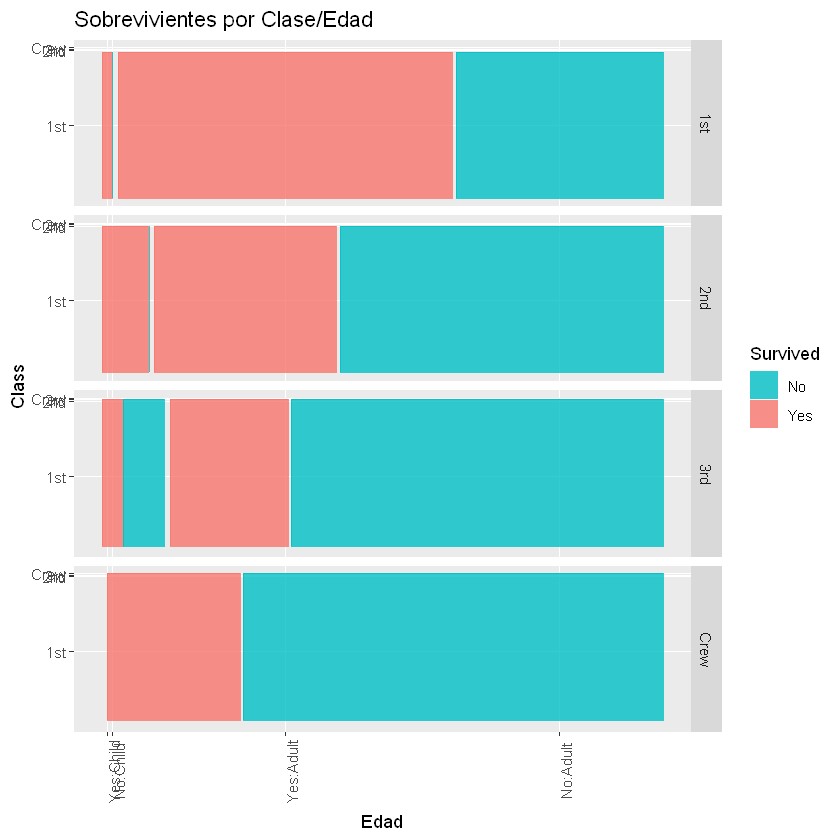

In [74]:
ggplot(data=titanic) + 
  geom_mosaic(aes(weight=Freq, x=product(Class,Age), fill=Survived))+
  labs(x="Edad", title='Sobrevivientes por Clase/Edad')  + 
  facet_grid(Class~.) + 
  guides(fill=guide_legend(title = "Survived", reverse = TRUE))+
  theme(axis.text.x=element_text(angle=90, vjust=1))

Uno de los problemas de mosaicos es que pueden llevar a la conclusión que la suma de las partes es mayor que el total

<a id='Treemaps'></a>
### TREEMAPS
Se usa un mapa de árbol para "mostrar datos jerárquicos usando figuras anidadas, generalmente rectángulos".
Hay muchas formas de hacerlo en R, la primera es con la librería treemap y la segunda es con ggplot
Con la librería treemap se pueden lograr gráficos simples pero buenos en una fase exploratoria
Los mapas de árbol funcionan bien si las subdivisiones de un grupo son completamente distintas de las subdivisiones de otro

geom_treemap tiene los siguientes aes: area (required), subgroup, subgroup2 , subgroup3 (required),colour,size,linetype,alpha

Primero un poco de data wrangling porque la data no está como la necesitamos

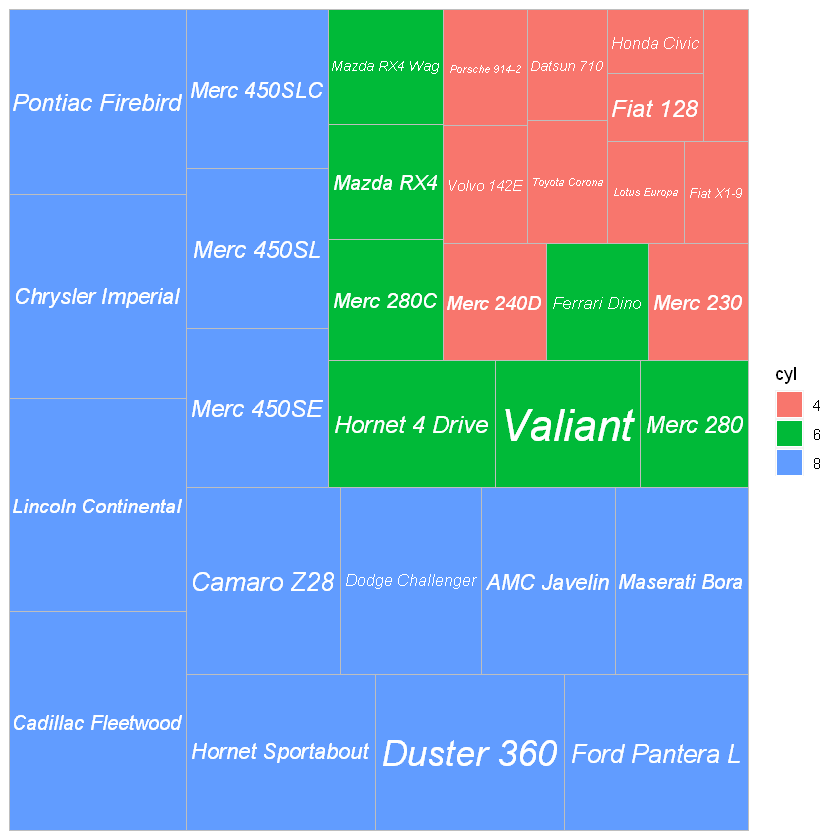

In [75]:
cars <- mtcars 
cars$carname <- rownames(cars)
cars <- mutate(cars, cyl = factor(cyl))

ggplot(data=cars, aes(area = disp, fill = cyl, label = carname)) +
  geom_treemap() +
  geom_treemap_text(
    fontface = "italic",
    colour = "white",
    place = "centre",
    grow = TRUE
  )

<a id='Paralel'></a>
### PARALEL SETS
En una visualización de conjuntos paralelos, a cada variable categ?rica se le asignará una posici?ó en el eje x.   
El tamaño de la intersección de categorías de variables vecinas se muestra luego como diagonales gruesas, escaladas por la suma de elementos compartidos entre las dos categorías. La representación de datos naturales para tal gráfico es tener cada variable categórica en una columna separada y luego tener una columna que indique la cantidad / magnitud de la combinación de niveles en la fila.   
Desafortunadamente, esta representación no se ajusta a la API ggplot2, que necesita la codificación de todas las posiciones en la misma columna.  
Para que sea más fácil trabajar con ggforce, se proporciona un asistente gather_set_data(), que se encarga de la transformación.

In [76]:
data(Titanic)
titanic<-as.data.frame(Titanic)

datadf <- reshape2::melt(Titanic)
head(datadf)

,Class,Sex,Age,Survived,value
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


Veamos un ejemplo con 2 niveles (Edad y Sobrevivencia)

In [77]:
data_gather <- gather_set_data(datadf, 3:4)

 Esta función sirve para crear el set, donde 3:4 son las columnas usadas como ejes, en ese orden, se puede alterar el orden de agregación

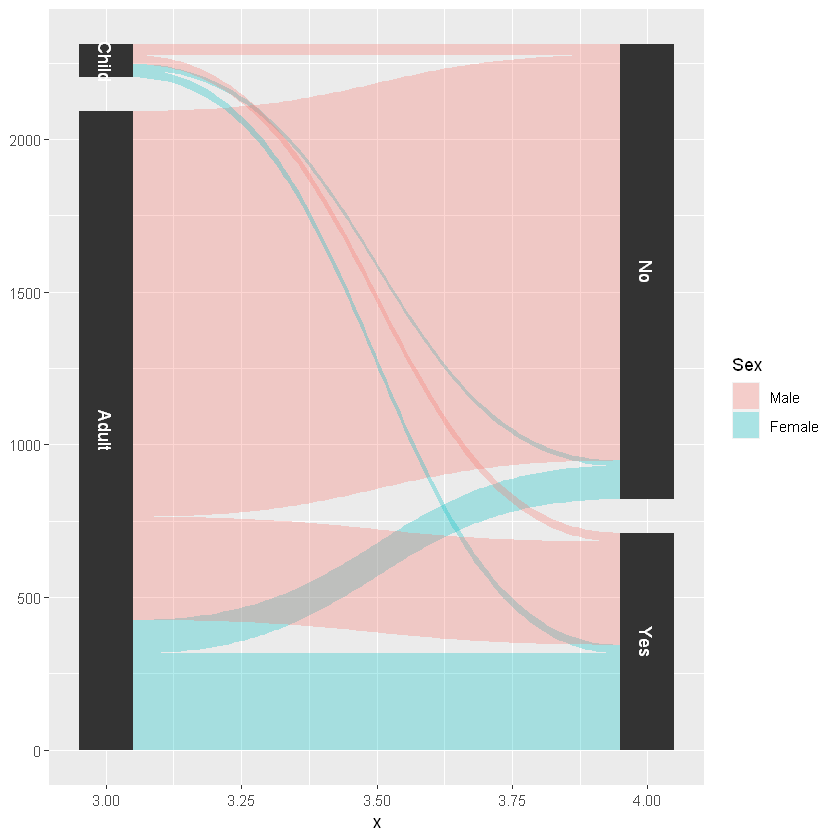

In [78]:
ggplot(data_gather, aes(x, id = id, split = y, value = value)) +
  geom_parallel_sets(aes(fill = Sex), alpha = 0.3, axis.width = 0.1) +
  geom_parallel_sets_axes(axis.width = 0.1) +
  geom_parallel_sets_labels(colour = 'white')

Veamos un ejemplo con 3 niveles (Edad, Sexo y sobrevivientes)

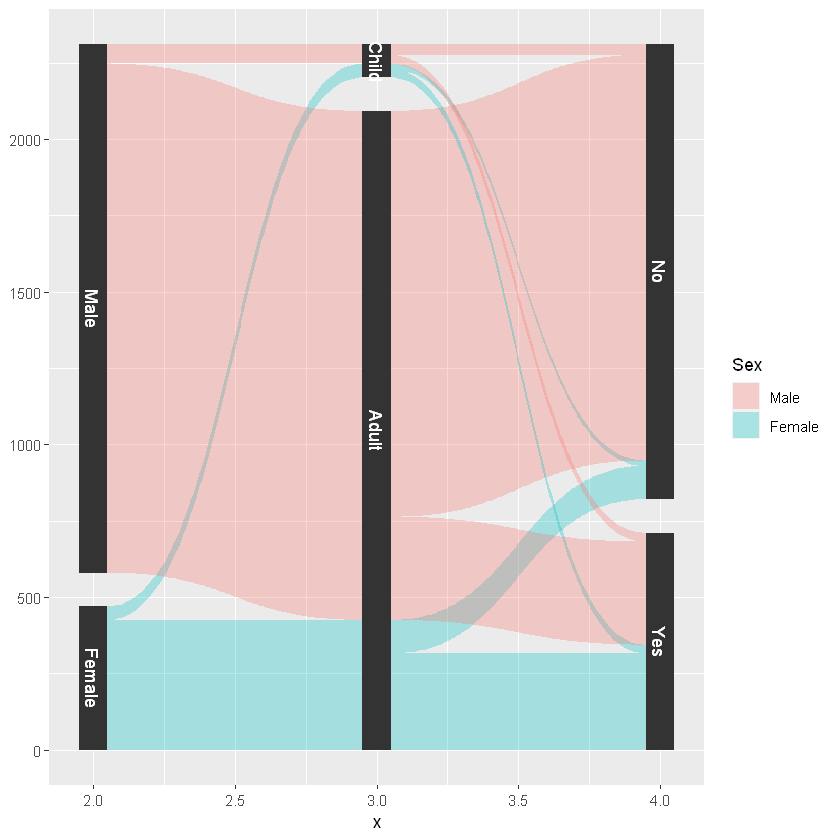

In [79]:
data_gather <- gather_set_data(datadf, c(3,2,4))
ggplot(data_gather, aes(x, id = id, split = y, value = value)) +
  geom_parallel_sets(aes(fill = Sex), alpha = 0.3, axis.width = 0.1) +
  geom_parallel_sets_axes(axis.width = 0.1) +
  geom_parallel_sets_labels(colour = 'white')

Veamos un ejemplo con 4 niveles (Sexo, Edad clase y sobrevivientes)

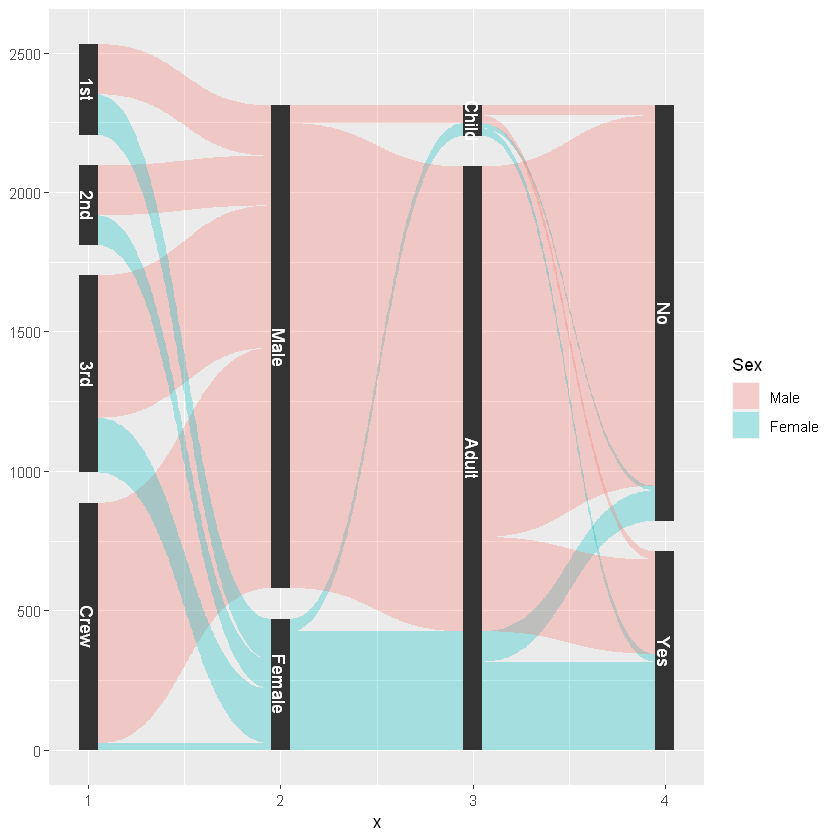

In [80]:
data_gather <- gather_set_data(datadf, 1:4)
ggplot(data_gather, aes(x, id = id, split = y, value = value)) +
  geom_parallel_sets(aes(fill = Sex), alpha = 0.3, axis.width = 0.1) +
  geom_parallel_sets_axes(axis.width = 0.1) +
  geom_parallel_sets_labels(colour = 'white')


Otras formas de sets paralelos pueden encontrar en este sitio: https://www.data-imaginist.com/2019/the-ggforce-awakens-again/

<a id='Geoespacial'></a>
## COORDENADAS GEODÉSICAS

* Coordenadas Geodésicas 
* [Proyección terrestre](#Proyeccion)
* [Sistemas de Coordenadas](#Coordenadas) 
* [Mapas con Facets](#Facets)

Los mapas pueden agregar un contexto vital al incorporar muchas variables en una visualización lo que los hace   fácil de leer y práctico.

El paquete **ggplot2** base no maneja datos espaciales específicamente, por tanto el estado actual de los objetos espaciales en R se basa en las clases espaciales definidas en el **paquete sp**, aunque el nuevo **paquete sf** ha implementado recientemente el estándar de *características simples*


* **Sp** es preferible cuando se desea integrar con otros sistemas GIS
* **Sf** es más simple de usar, más intuitivo y más rápido

Si no han sido instalados previamente, instalemos los paquetes necesarios:

Antes de instalar las librerías ejecute en un terminal de GNU/Linux
* sudo apt install subversion
* sudo apt install libgeos-dev
* sudo apt install libjq-dev
* sudo apt install libudunits2-dev
* sudo apt install gdal-bin
* sudo apt install libgdal-dev

In [81]:
install.packages(c("maps","rgeos","cowplot", "googleway", "ggrepel", "ggspatial","libwgeom", "sf", "rnaturalearth", "rnaturalearthdata", "rnaturalearthhires"))

Installing packages into 'C:/Users/pc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'maps' successfully unpacked and MD5 sums checked
package 'rgeos' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'googleway' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'ggspatial' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'rnaturalearth' successfully unpacked and MD5 sums checked
package 'rnaturalearthdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pc\AppData\Local\Temp\RtmpuaI5EK\downloaded_packages


limpiemos las variables:

In [82]:
rm(list=ls())

Carguemos las librerías:

In [83]:
require(maps)
require(rgeos)
require(cowplot)
require(googleway)
require(ggrepel)
require(lwgeom)
#require(libwgeom)  #esta no existe 
require(sf)
require(rnaturalearth)
require(rnaturalearthdata)
#require(rnaturalearthhires)  #este require Rtools pero Rtools no esta disponible para esta version R
require(devtools)
require("ggplot2")
#install_github("ropensci/rnaturalearthhires")  #posiblemente no necesitamos 
require("ggspatial")

Loading required package: maps


Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map


Loading required package: rgeos

Loading required package: sp

rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.9.3-CAPI-1.14.3 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 1.6-1 
 Polygon checking: TRUE 



Attaching package: 'rgeos'


The following object is masked from 'package:dplyr':

    symdiff


Loading required package: cowplot


Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp


Loading required package: googleway

Loading required package: ggrepel

Loading required package: lwgeom

Loading required package: sf

Linking to GEOS 3.9.3, GDAL 3.5.2, PROJ 8.2.1; sf_use_s2() is TRUE


<a id='Proyeccion'></a>
## Proyección Terrestre
Primero cargamos el mapa de la tierra, 

In [84]:
world <- ne_countries(scale = "small", returnclass = "sf")
names(world)
sudamerica <- ne_countries(scale = "small", returnclass = "sf", continent="South America")

[1] "featurecla" "scalerank"  "labelrank"  "sovereignt" "sov_a3"    
  [6] "adm0_dif"   "level"      "type"       "tlc"        "admin"     
 [11] "adm0_a3"    "geou_dif"   "geounit"    "gu_a3"      "su_dif"    
 [16] "subunit"    "su_a3"      "brk_diff"   "name"       "name_long" 
 [21] "brk_a3"     "brk_name"   "brk_group"  "abbrev"     "postal"    
 [26] "formal_en"  "formal_fr"  "name_ciawf" "note_adm0"  "note_brk"  
 [31] "name_sort"  "name_alt"   "mapcolor7"  "mapcolor8"  "mapcolor9" 
 [36] "mapcolor13" "pop_est"    "pop_rank"   "pop_year"   "gdp_md"    
 [41] "gdp_year"   "economy"    "income_grp" "fips_10"    "iso_a2"    
 [46] "iso_a2_eh"  "iso_a3"     "iso_a3_eh"  "iso_n3"     "iso_n3_eh" 
 [51] "un_a3"      "wb_a2"      "wb_a3"      "woe_id"     "woe_id_eh" 
 [56] "woe_note"   "adm0_iso"   "adm0_diff"  "adm0_tlc"   "adm0_a3_us"
 [61] "adm0_a3_fr" "adm0_a3_ru" "adm0_a3_es" "adm0_a3_cn" "adm0_a3_tw"
 [66] "adm0_a3_in" "adm0_a3_np" "adm0_a3_pk" "adm0_a3_de" "adm0_a3_gb"
 [71] "adm0_a3_br" "adm0_a3_il" "adm0_a3_ps" "adm0_a3_sa" "adm0_a3_eg"
 [76] "adm0_a3_ma" "adm0_a3_pt" "adm0_a3_ar" "adm0_a3_jp" "adm0_a3_ko"
 [81] "adm0_a3_vn" "adm0_a3_tr" "adm0_a3_id" "adm0_a3_pl" "adm0_a3_gr"
 [86] "adm0_a3_it" "adm0_a3_nl" "adm0_a3_se" "adm0_a3_bd" "adm0_a3_ua"
 [91] "adm0_a3_un" "adm0_a3_wb" "continent"  "region_un"  "subregion" 
 [96] "region_wb"  "name_len"   "long_len"   "abbrev_len" "tiny"      
[101] "homepart"   "min_zoom"   "min_label"  "max_label"  "label_x"   
[106] "label_y"    "ne_id"      "wikidataid" "name_ar"    "name_bn"   
[111] "name_de"    "name_en"    "name_es"    "name_fa"    "name_fr"   
[116] "name_el"    "name_he"    "name_hi"    "name_hu"    "name_id"   
[121] "name_it"    "name_ja"    "name_ko"    "name_nl"    "name_pl"   
[126] "name_pt"    "name_ru"    "name_sv"    "name_tr"    "name_uk"   
[131] "name_ur"    "name_vi"    "name_zh"    "name_zht"   "fclass_iso"
[136] "tlc_diff"   "fclass_tlc" "fclass_us"  "fclass_fr"  "fclass_ru" 
[141] "fclass_es"  "fclass_cn"  "fclass_tw"  "fclass_in"  "fclass_np" 
[146] "fclass_pk"  "fclass_de"  "fclass_gb"  "fclass_br"  "fclass_il" 
[151] "fclass_ps"  "fclass_sa"  "fclass_eg"  "fclass_ma"  "fclass_pt" 
[156] "fclass_ar"  "fclass_jp"  "fclass_ko"  "fclass_vn"  "fclass_tr" 
[161] "fclass_id"  "fclass_pl"  "fclass_gr"  "fclass_it"  "fclass_nl" 
[166] "fclass_se"  "fclass_bd"  "fclass_ua"  "geometry"

* Note los argumentos scale, donde la escala puede ser small/medium/large
* Note el tipo de objeto que nos devuelve  puede ser sp(por defecto) o sf 
* Note las propiedades del objeto retornado contiene 64 campos sobre los países y territorios

Veamos una primera visualización 

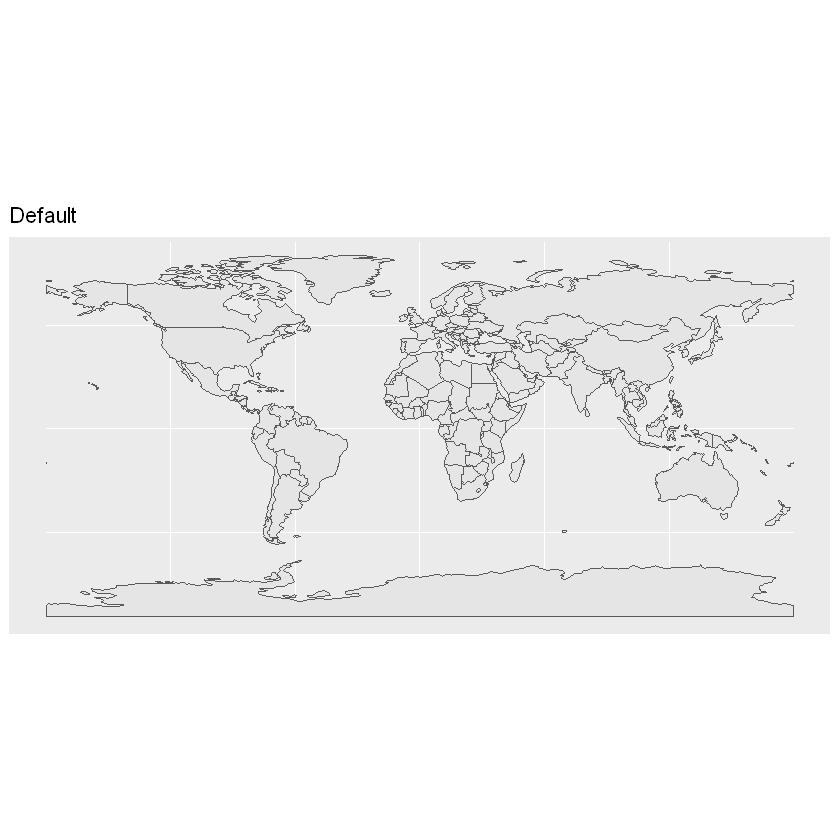

In [85]:
defplot <-   ggplot(data = world) +
  geom_sf()+
  ggtitle("Default")
defplot

Note que esta proyección presenta una gran distorción hacia los polos (Antartica), pero podemos convertirle usando CRS o Proj4 

**Proj4js** es una biblioteca de JavaScript para transformar coordenadas de puntos de un sistema de coordenadas a otro, incluidas las transformaciones de datums (puntos de referencia) incluidos .

Para encontrar los códigos **proj4** debemos referirnos a : https://spatialreference.org/, abrir este URL , y buscar la transformacion deseada ej: **Robinson**, desplegar **Proj4js** format y copiar la transformación a la función.

Robinson y Winkel son proyecciones intermedias entre ?reas Iguales y Conforme

In [86]:
robinson <- sf::st_transform(
  world,
  "+proj=robin +lon_0=0 +x_0=0 +y_0=0 +a=6371000 +b=6371000 +units=m +no_defs"
)

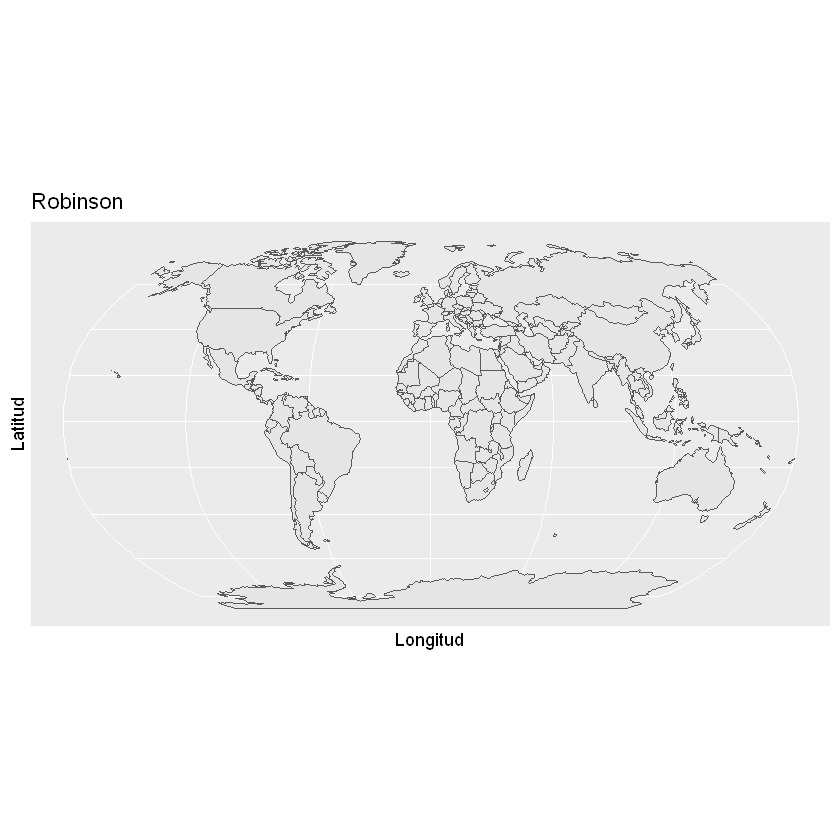

In [87]:
robinsonplot<- ggplot(data = robinson) +
  geom_sf() +
  xlab("Longitud") + ylab("Latitud") +
  ggtitle("Robinson")

robinsonplot

Ahora con Mollweide que es de áreas iguales

In [88]:
mollweide <- sf::st_transform(
  world,
  "+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
)

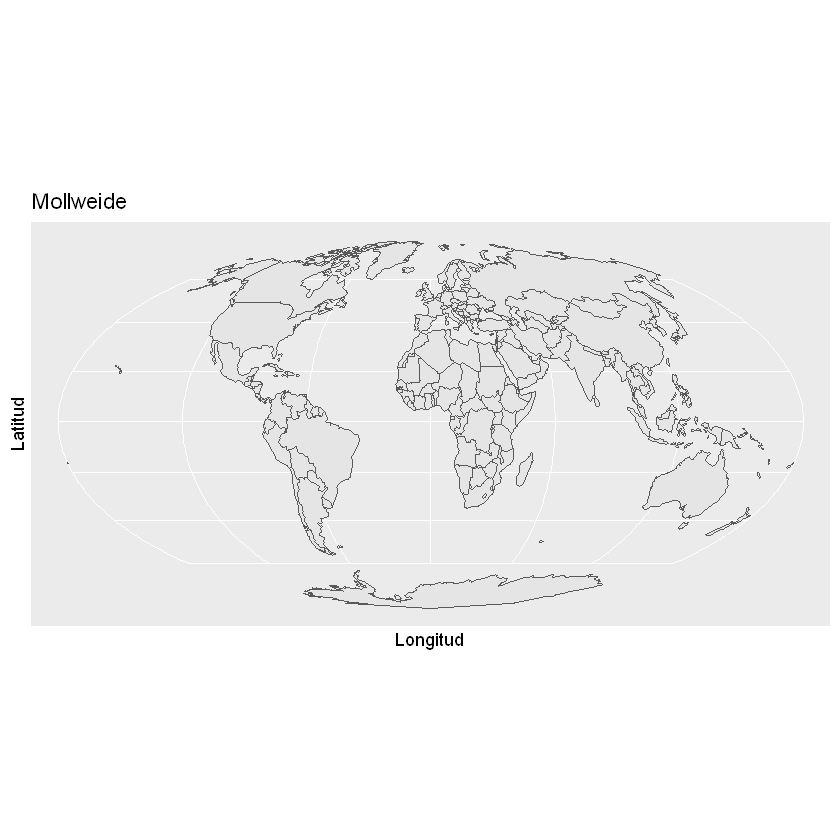

In [89]:
mollweideplot <-ggplot(data = mollweide) +
  geom_sf() +
  xlab("Longitud") + ylab("Latitud") +
  ggtitle("Mollweide")

mollweideplot

Ahora con mercator que es conforme

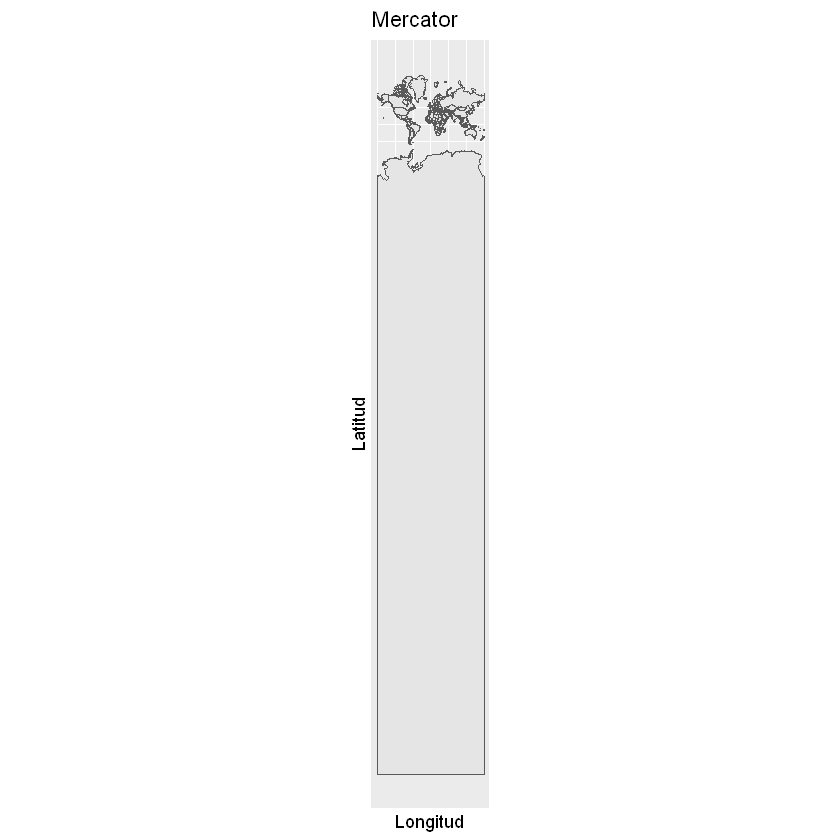

In [90]:
mercator <- sf::st_transform(
  world,
  "+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext  +no_defs"
)

mercatorplot <-ggplot(data = mercator) +
  geom_sf() +
  xlab("Longitud") + ylab("Latitud") +
  ggtitle("Mercator")

mercatorplot


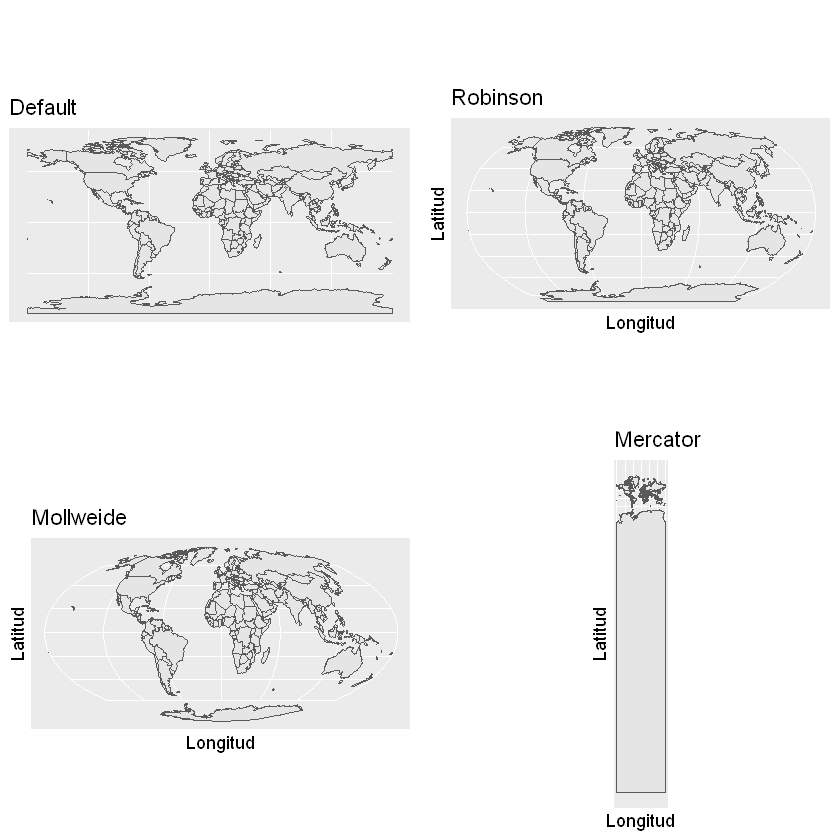

In [91]:
plot_grid(defplot,robinsonplot,mollweideplot, mercatorplot)

En el siguiente ejemplo obtenemos la cantidad de países de la data

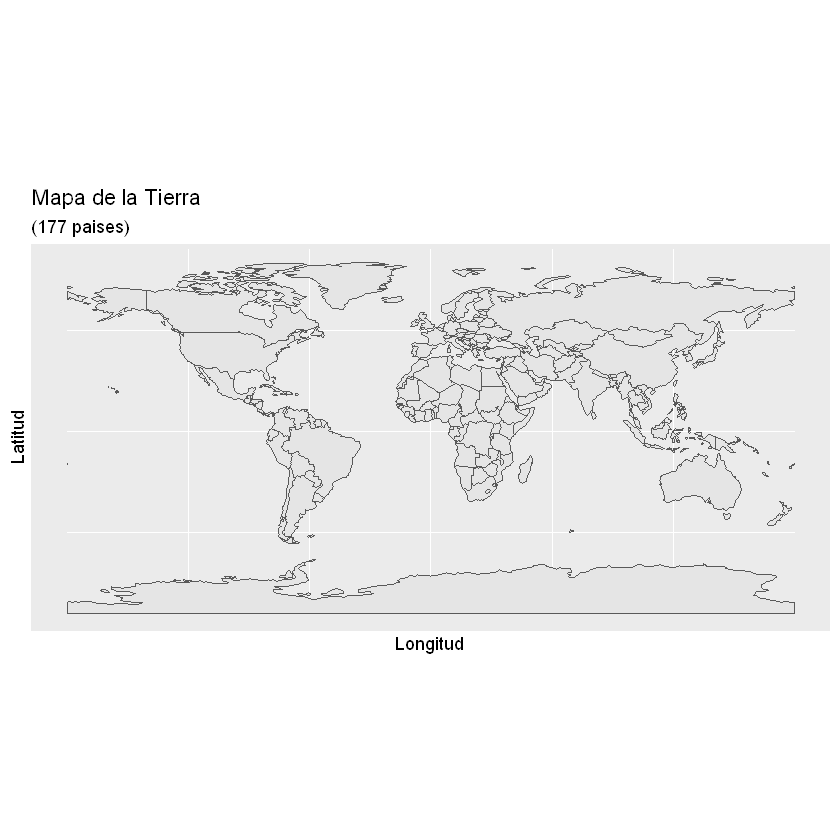

In [92]:
ggplot(data = world) +
  geom_sf() +
  xlab("Longitud") + ylab("Latitud") +
  ggtitle("Mapa de la Tierra ", subtitle = paste0("(",length(unique(world$name)), " paises)"))   

El siguiente mapa en color verde y contraste con países en negro 

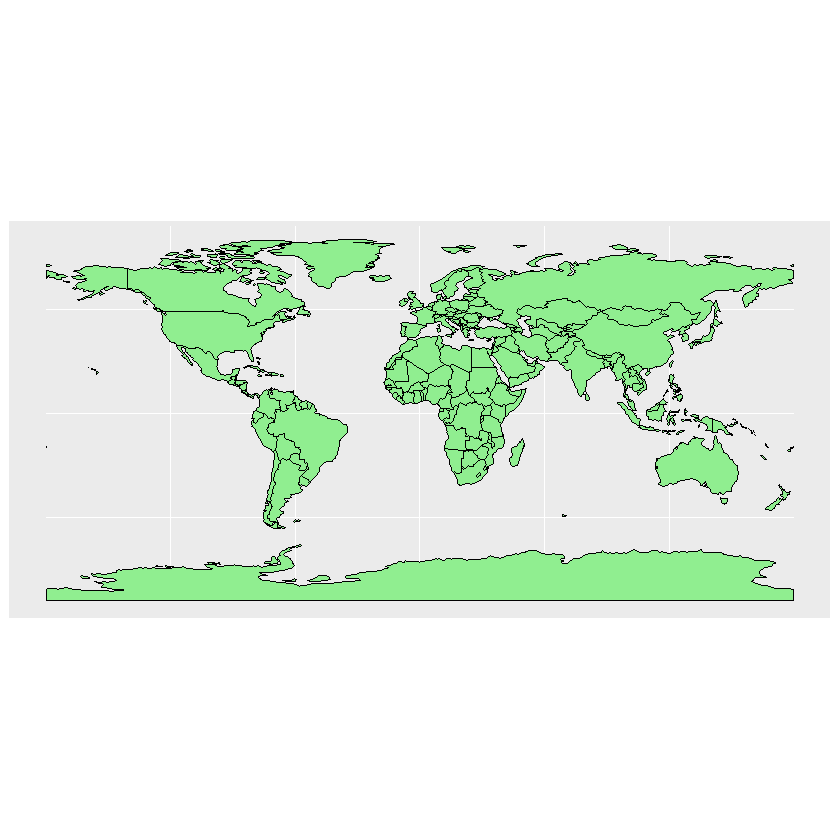

In [93]:
ggplot(data = world) + 
  geom_sf(color = "black", fill = "lightgreen")

El dataset tiene mucha información sobre el mundo, veamos un mapa con la población

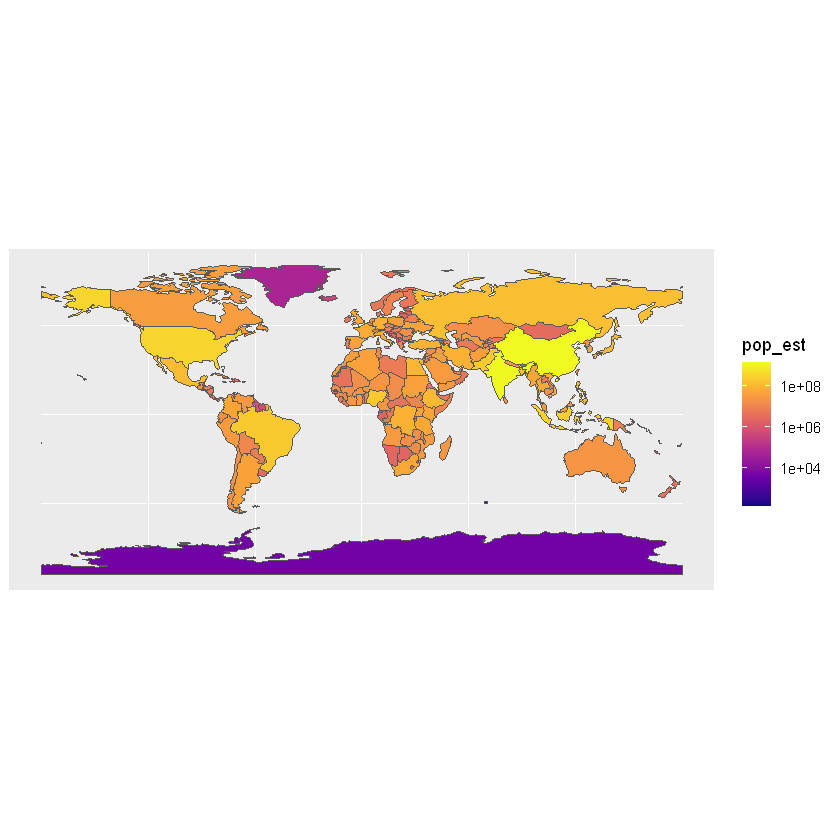

In [94]:
ggplot(data = world) +
  geom_sf(aes(fill = pop_est)) +
  scale_fill_viridis_c(option = "plasma", trans = "log10")

<a id='Coordenadas'></a>
## Coordenadas
El segundo tema que debemos tener en cuenta es el formato de las coordenadas, es decir como vamos a especificar las localización de un punto que está en la tierra que es esférica en un mapa de dos dimensiones. Esto lo hacemos
mediante sistemas de referencia de coordenadas geográficas o CRS

Con la ayuda de los sistemas de referencia de coordenadas (CRS), cada lugar de la tierra se puede especificar mediante un conjunto de tres números, llamados coordenadas.Que son : 

* latitud 
* longitud y,
* a veces, también un valor de altura 

Esto nos sirve para describir una ubicación en la superficie de la tierra. El más popular se llama WGS84. 

Además de lo anterior el CRS contiene las unidades usadas para definir  los ejes X Y , los Datum que #son los orígenes utilizados para colocar el sistema de coordenadas en el espacio y la información de la proyección que es la ecuación matemática utilizada para aplanar objetos que están en una superficie redonda para que pueda verlos en una superficie plana 


La función **coord_sf()** permite manejar el sistema de coordenadas, 

De forma predeterminada, el mapa usará el sistema de coordenadas de la primera capa que defina, o por defecto usar? WGS84  (ver https://en.wikipedia.org/wiki/World_Geodetic_System) (latitud/longitud) y es el sistema de referencia usado en GPS


Para cambiar la proyección deberemos usar la función coord_sf() y manipular el argumento crs. 

crs puede tomar códigos de varios tipos: 
* EPSG European Petroleum Survey Group EPSG 
* ETRS European Terrestrial Reference System 1989
* Proj4


**PROJ4** es un tipo antiguo pero todavía puede ser usado.  
Para obtenerlo puede referirse a https://spatialreference.org , buscar las proyecciones listadas, seleccionar una proyección y buscar el códigos PROJ4 apropiado.

Se puede hacer referencia a un CRS mediante un número SRID que forma parte de  códigos EPSG. 

## Ejemplo

In [95]:
crs1 <- coord_sf(crs = "+proj=longlat +ellps=WGS84 +no_defs")

#### Para Europa


In [96]:
coord_sf(crs = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs")


<ggproto object: Class CoordSf, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    crs: +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 ...
    datum: crs
    default: FALSE
    default_crs: NULL
    determine_crs: function
    distance: function
    expand: TRUE
    fixup_graticule_labels: function
    get_default_crs: function
    is_free: function
    is_linear: function
    label_axes: list
    label_graticule: 
    labels: function
    limits: list
    lims_method: cross
    modify_scales: function
    ndiscr: 100
    params: list
    range: function
    record_bbox: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordSf, Coord

Para Ecuador 

In [97]:
coord_sf(crs = "+proj=longlat +ellps=WGS84 +no_defs") 

<ggproto object: Class CoordSf, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    crs: +proj=longlat +ellps=WGS84 +no_defs
    datum: crs
    default: FALSE
    default_crs: NULL
    determine_crs: function
    distance: function
    expand: TRUE
    fixup_graticule_labels: function
    get_default_crs: function
    is_free: function
    is_linear: function
    label_axes: list
    label_graticule: 
    labels: function
    limits: list
    lims_method: cross
    modify_scales: function
    ndiscr: 100
    params: list
    range: function
    record_bbox: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordSf, CoordCartesian, Coord, gg>

Para Argentina

In [98]:
coord_sf(crs ="+proj=laea +lat_0=-40 +lon_0=-60 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs")


<ggproto object: Class CoordSf, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    crs: +proj=laea +lat_0=-40 +lon_0=-60 +x_0=0 +y_0=0 +ellps=WG ...
    datum: crs
    default: FALSE
    default_crs: NULL
    determine_crs: function
    distance: function
    expand: TRUE
    fixup_graticule_labels: function
    get_default_crs: function
    is_free: function
    is_linear: function
    label_axes: list
    label_graticule: 
    labels: function
    limits: list
    lims_method: cross
    modify_scales: function
    ndiscr: 100
    params: list
    range: function
    record_bbox: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordSf, Coord

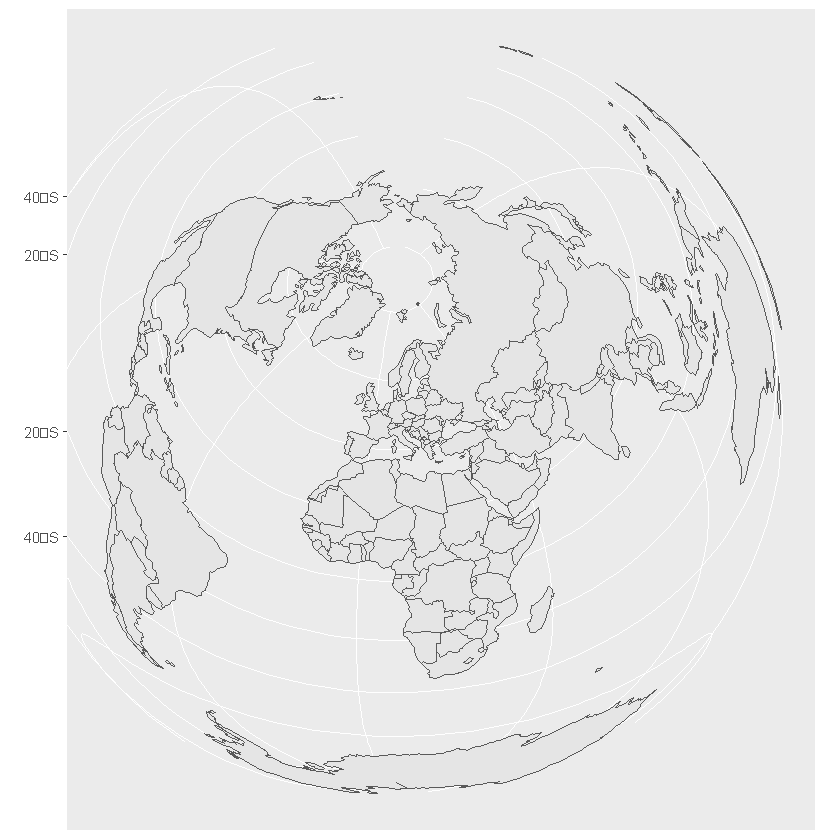

In [99]:
ggplot(data = world) +
  geom_sf() +
  coord_sf(crs ="+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs")

La segunda usando el SRID de EPSG

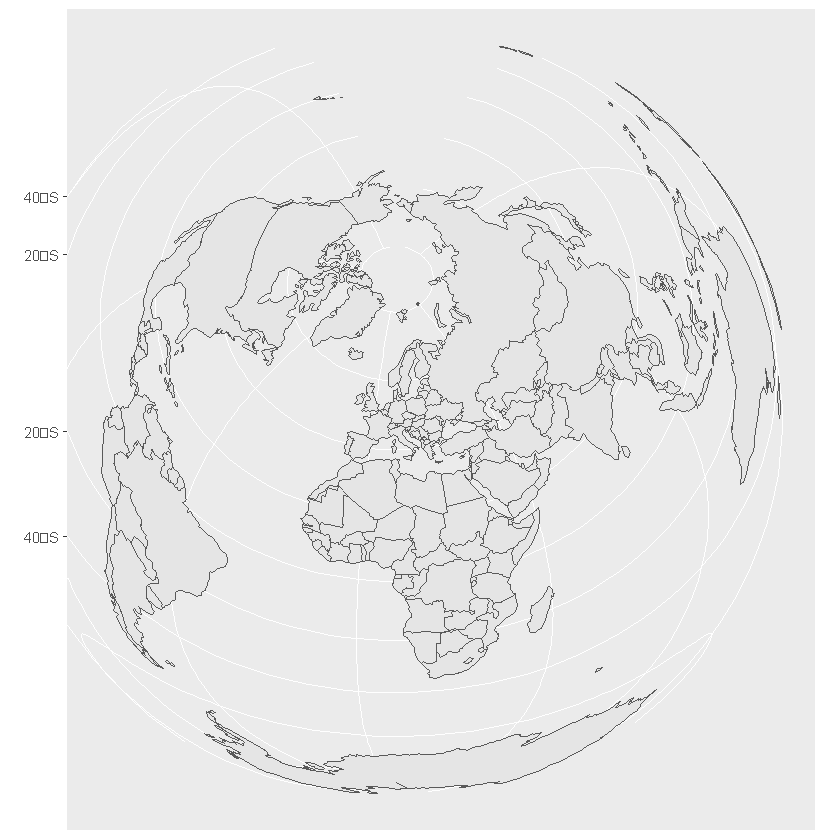

In [100]:
ggplot(data = world) +
  geom_sf() +
  coord_sf(crs = "+init=epsg:3035")

Y la tercera usando la función st_crs para que  vaya y busque el código EPSG

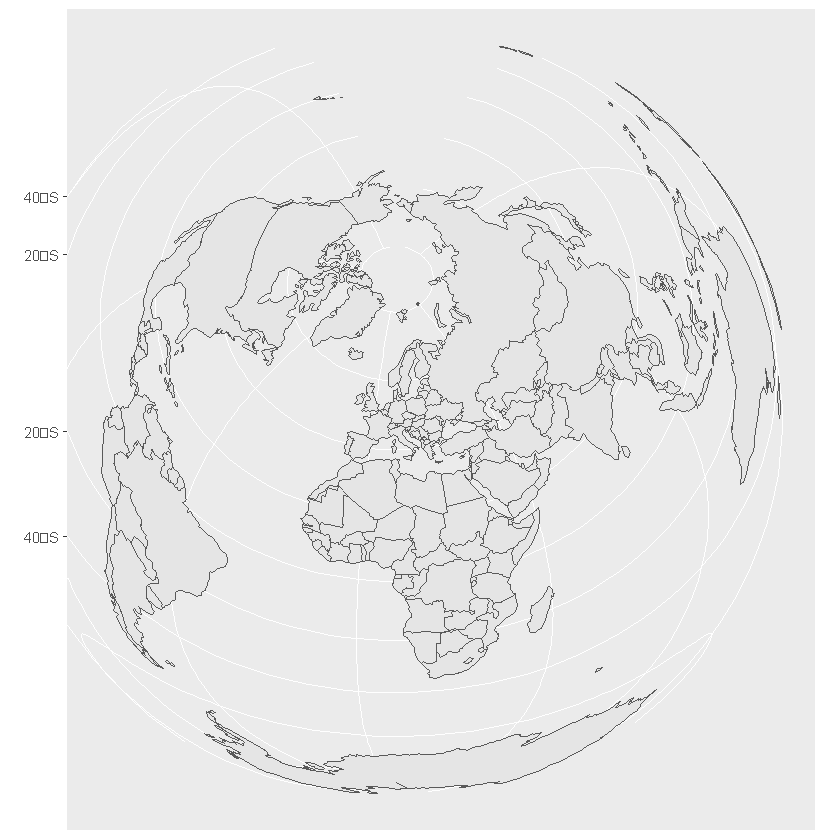

In [101]:
ggplot(data = world) +
  geom_sf() +
  coord_sf(crs = st_crs(3035))

La extensión del mapa también se puede establecer en coord_sf(), lo que en la práctica permite "hacer zoom" en el área de interés,  proporcionado por límites en el eje x (xlim) y en el eje y (ylim).


#### Para Ecuador 

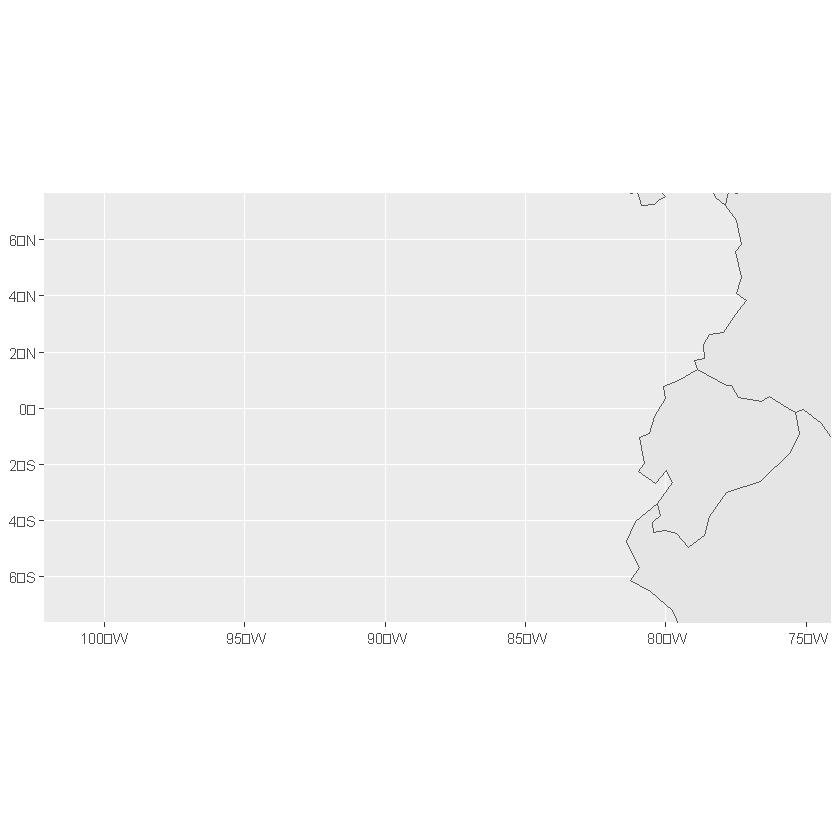

In [102]:
ggplot(data = world) +
  geom_sf()+
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(-7.65, 7.65), expand = FALSE)

MAS PUNTOS DE INTERÉS DEL ECUADOR EN EL URL https://www.geodatos.net/coordenadas/ecuador

#### Para Centro America

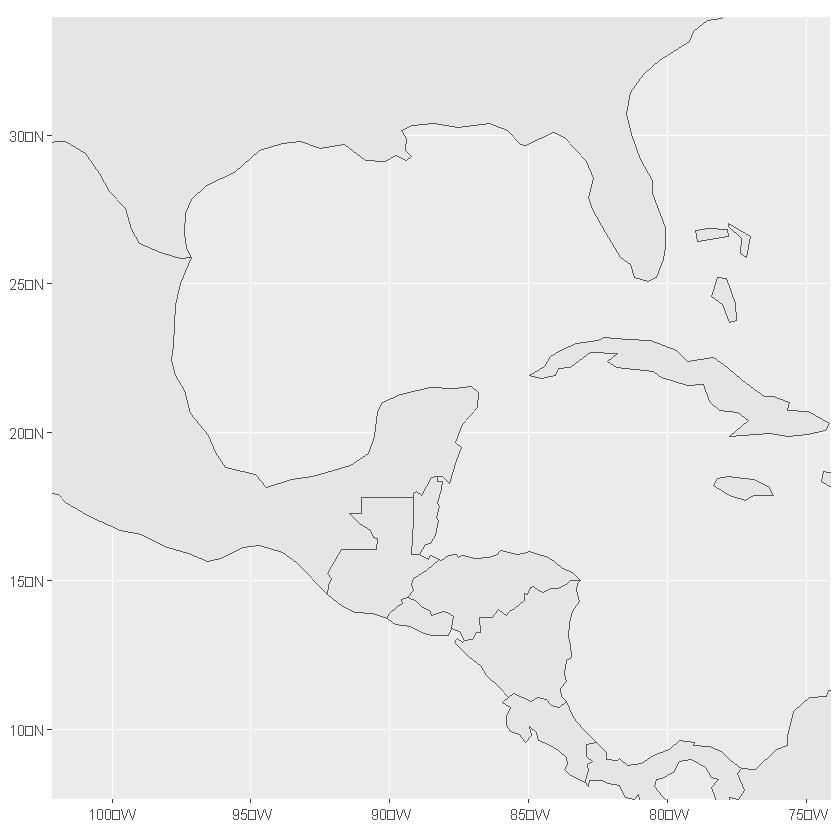

In [103]:
ggplot(data = world) +
  geom_sf() +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97), expand = FALSE)

Hay varios paquetes disponibles para crear la barra de escala en un mapa por ejemplo:  
prettymapr, vcd, ggsn o legendMap, para el presente lab usaremos ggspatial, que proporciona funciones fáciles de usar.

La ubicación de la barra de escala debe especificarse en longitud / latitud  en los argumentos lon y lat.

La distancia sombreada dentro de la barra de escala está controlada por el argumento distance_lon. mientras que su ancho está determinado por distance_lat

Scale on map varies by more than 10%, scale bar may be inaccurate



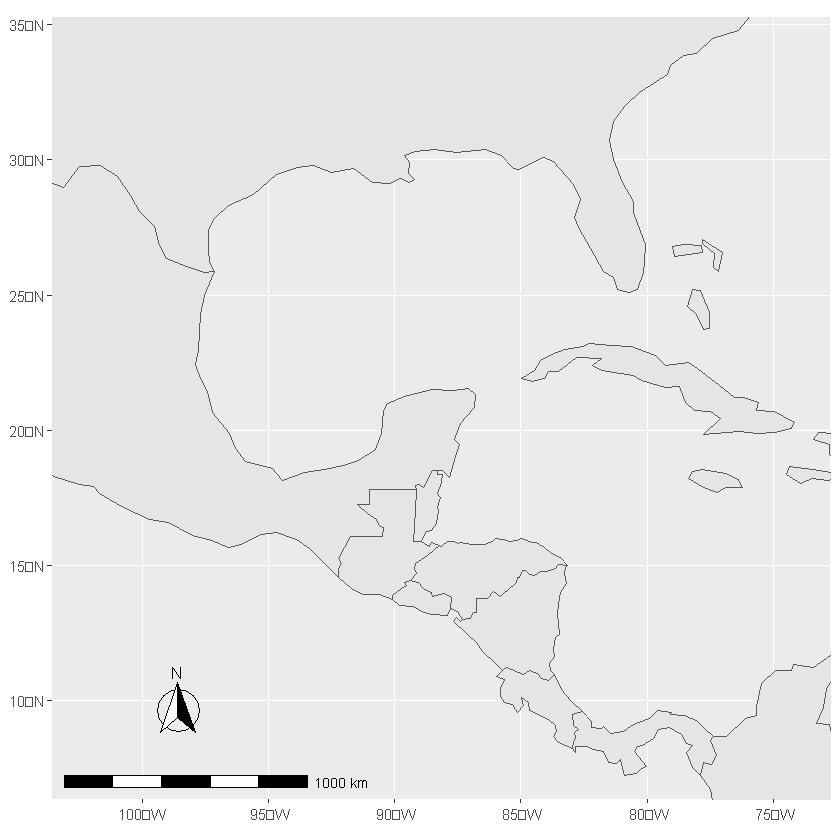

In [104]:
ggplot(data = world) +
  geom_sf() +
  annotation_scale(location = "bl", width_hint = 0.5) +
  annotation_north_arrow(location = "bl", which_north = "true", 
                         pad_x = unit(0.75, "in"), pad_y = unit(0.5, "in"),
                         style = north_arrow_fancy_orienteering) +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97))

**location** es localización de la escala (bl= bottom left , tl=top left )


El mapa mundial ya contiene nombres de países y las coordenadas de un centroide de cada país (entre otras informaciones). Las coordenadas del centroide son X y Y 


Podemos usar esta información para trazar nombres de paóses,


La función **geom_text** se puede usar para agregar una capa de texto a un mapa usando coordenadas geográficas.

Spherical geometry (s2) switched off



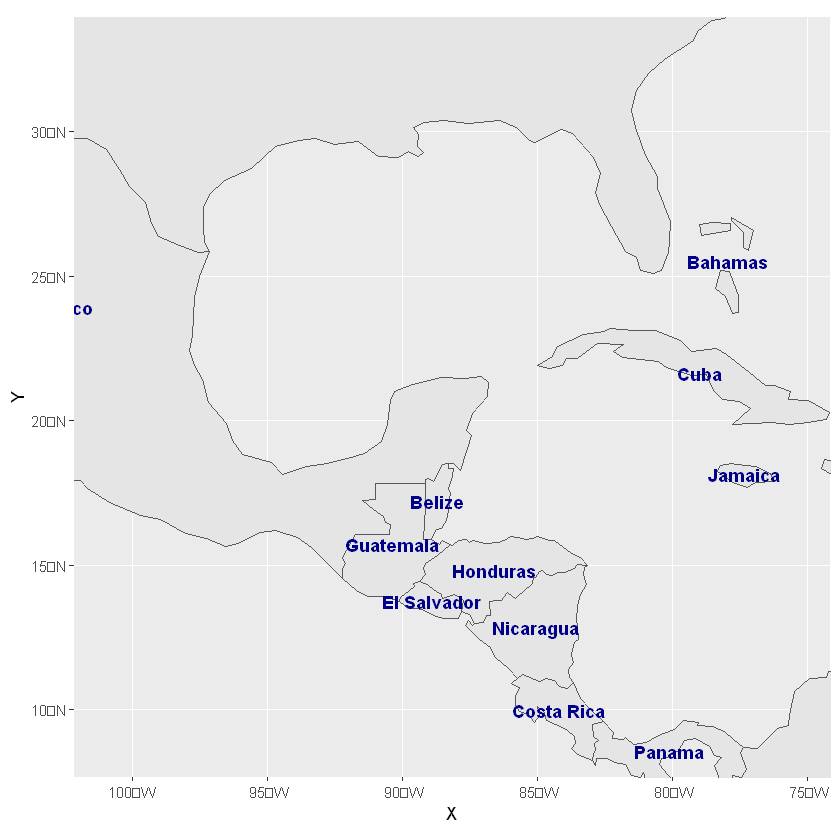

In [105]:
sf::sf_use_s2(FALSE)   #no usar objetos s2
world_points<- st_centroid(world)
world_points <- cbind(world, st_coordinates(st_centroid(world$geometry)))

ggplot(data = world) +
  geom_sf() +
  geom_text(data= world_points,aes(x=X, y=Y, label=name),
            color = "darkblue", fontface = "bold", check_overlap = FALSE) +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97), expand = FALSE)

#### MAPA COMPLETO  DEL CENTROAMERICA

Scale on map varies by more than 10%, scale bar may be inaccurate



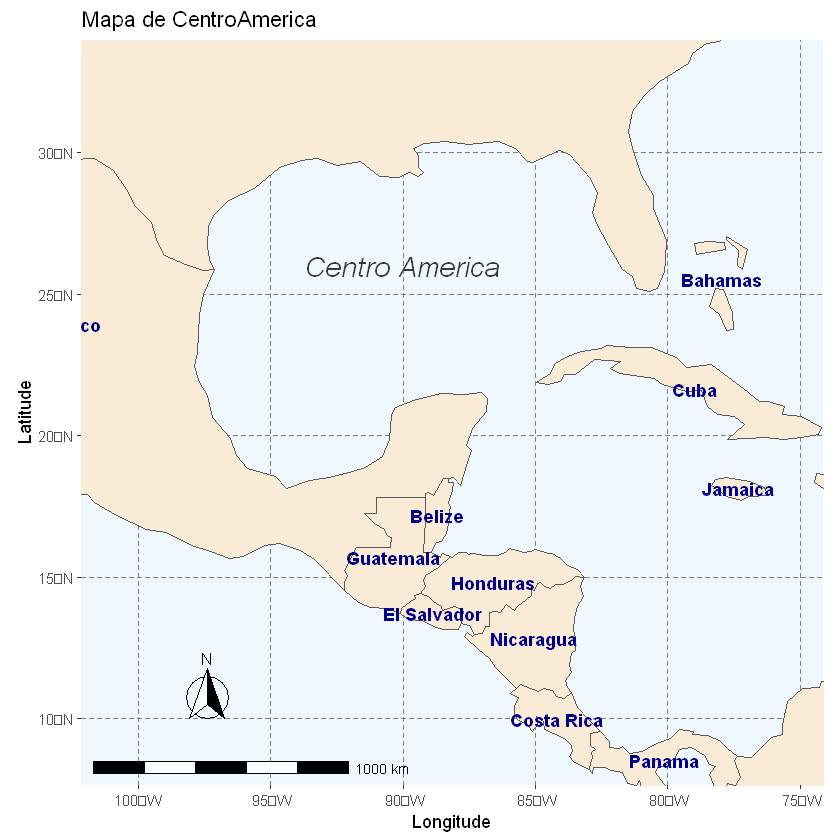

In [106]:
ggplot(data = world) + 
  geom_sf(fill= "antiquewhite") + 
  geom_text(data= world_points,aes(x=X, y=Y, label=name)
   , color = "darkblue", fontface = "bold" 
   , check_overlap = FALSE) + 
  annotate(geom = "text", x = -90, y = 26, label = "Centro America"
           , fontface = "italic", color = "grey22", size = 6) +
  annotation_scale(location = "bl", width_hint = 0.5) + 
  annotation_north_arrow(location = "bl", which_north = "true"
    , pad_x = unit(0.75, "in"), pad_y = unit(0.5, "in")
    , style = north_arrow_fancy_orienteering) +
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97)
    ,expand = FALSE) + xlab("Longitude") + ylab("Latitude")+ 
  ggtitle("Mapa de CentroAmerica") + theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), panel.background = element_rect(fill = "aliceblue"))



#### MAPA COMPLETO  DEL ECUADOR
* Añadiendo un capa de ciudades 
* Creamos un data.frame que contiene las coordenadas

[1] "name"        "country.etc" "pop"         "lat"         "long"       
[6] "capital"

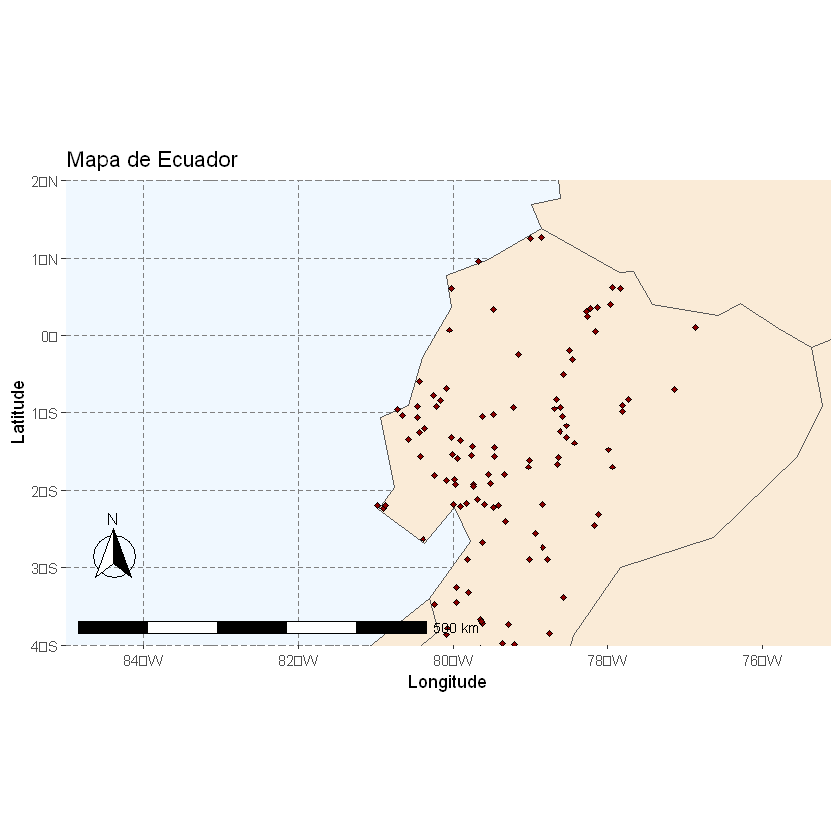

In [107]:
data(world.cities)
names(world.cities)

sitios <- data.frame(longitude = world.cities[world.cities$country.etc=="Ecuador",5]
                     , latitude = world.cities[world.cities$country.etc=="Ecuador",4])

ggplot(data = world) + 
  geom_sf(fill= "antiquewhite") + 
  geom_point(data = sitios, aes(x = longitude, y = latitude), size = 1, 
             shape = 23, fill = "darkred") +
  coord_sf(xlim = c(-85.0, -75.12), ylim = c(-4, 2), expand = FALSE) +
  annotation_scale(location = "bl", width_hint = 0.5) + 
  annotation_north_arrow(location = "bl", which_north = "true"
     ,pad_x = unit(0.1, "in"), pad_y = unit(0.5, "in")
     ,style = north_arrow_fancy_orienteering) + 
  xlab("Longitude") + ylab("Latitude") + ggtitle("Mapa de Ecuador") + theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), panel.background = element_rect(fill = "aliceblue"))


<a id='Facets'></a>
## Mapa con FACETS  
Hay veces que nos interesa ver  una evolución de indicadores por cada elemento geogr?fico, en este caso podemos usar la función facet

In [108]:
world <- ne_countries(scale = "small", returnclass = "sf")
#Un poco de datawrangling 
world$gdp_md_est[is.na(world$gdp_md)] <- 0
world$gdp_md_est[world$gdp_md<=20000] <- 1
world$gdp_md_est[world$gdp_md>20000  &  world$gdp_md<=100000] <- 2
world$gdp_md_est[world$gdp_md>100000  &  world$gdp_md<=200000] <- 3
world$gdp_md_est[world$gdp_md>200000  &  world$gdp_md<=1000000] <- 4
world$gdp_md_est[world$gdp_md>1000000  &  world$gdp_md<=20000000] <- 5

world_points<- st_centroid(world)
world_points <- cbind(world, st_coordinates(st_centroid(world$geometry)))


centro <- subset(world , world$sov_a3 == "CAN"
                 |world$sov_a3 == "US1"
                 |world$sov_a3 == "MEX"
                 |world$sov_a3 == "GTM"
                 |world$sov_a3 == "SLV"
                 |world$sov_a3 == "NIC"
                 |world$sov_a3 == "CRI"
                 |world$sov_a3 == "PAN"
                 |world$sov_a3 == "HND"
                 |world$sov_a3 == "BLZ" )

centro_points <- subset(world_points , world_points$sov_a3 == "CAN"
                                |world_points$sov_a3 == "US1"
                                |world_points$sov_a3 == "MEX"
                                |world_points$sov_a3 == "GTM"
                                |world_points$sov_a3 == "SLV"
                                |world_points$sov_a3 == "NIC"
                                |world_points$sov_a3 == "CRI"
                                |world_points$sov_a3 == "PAN"
                                |world_points$sov_a3 == "HND"
                                |world_points$sov_a3 == "BLZ" )

ESTE SALE MÁS  FACETS PORQUE ESTA COLOCANDO NOMBRES DE WORLD POINTS QUE ESTÁN EN TODO EL MUNDO , Y WORLDPOINTS TIENE GDP_MD_EST

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate



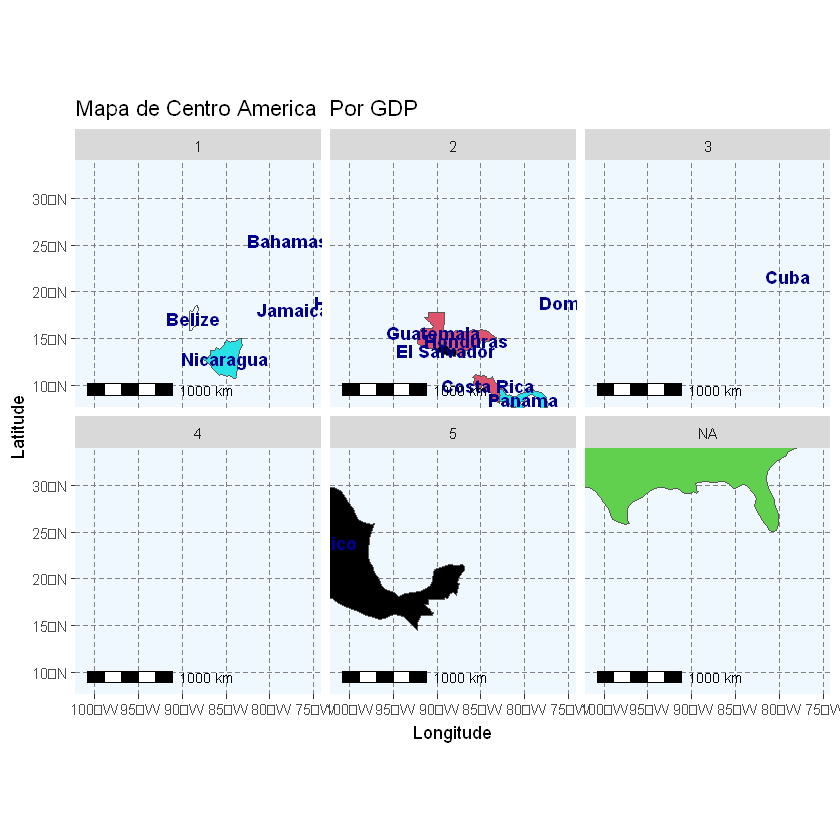

In [109]:
ggplot(data = centro) + 
  geom_sf(fill= centro$gdp_md_est) + 
  geom_text(data= world_points,aes(x=X, y=Y, label=name) 
    , color = "darkblue", fontface = "bold" 
     , check_overlap = FALSE) +
      facet_wrap(vars(gdp_md_est))+
    annotation_scale(location = "bl", width_hint = 0.5) + 
    coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 33.97)
           ,expand = FALSE) + xlab("Longitude") + ylab("Latitude")+ 
  ggtitle("Mapa de Centro America  Por GDP") + 
  theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), panel.background = element_rect(fill = "aliceblue"))


#### Versión con nombres y centroides

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate

Scale on map varies by more than 10%, scale bar may be inaccurate



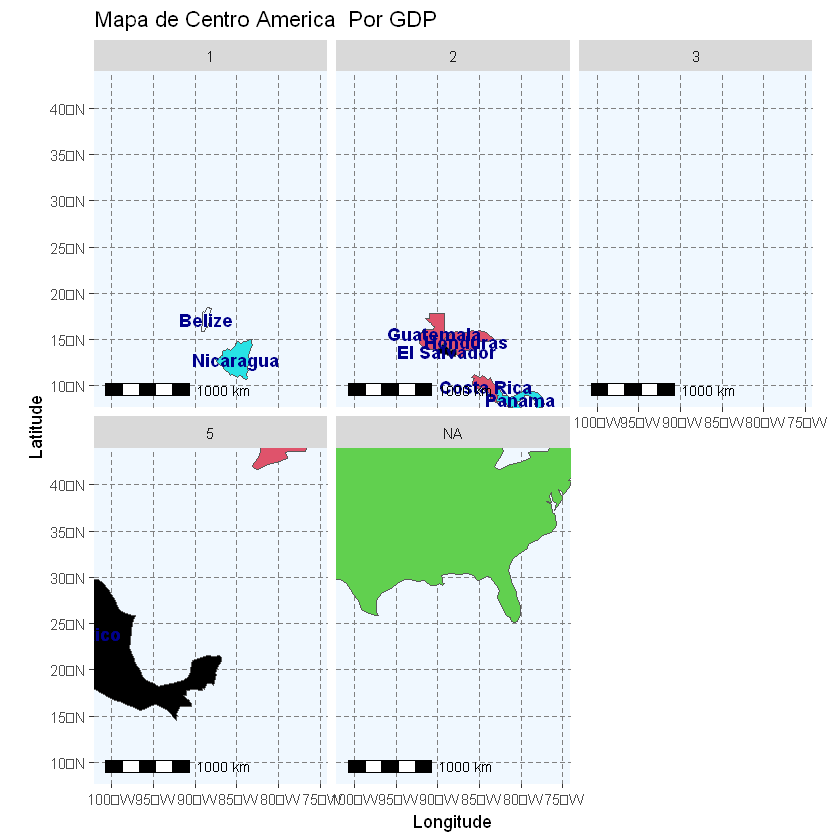

In [110]:
ggplot(data = centro) + 
  geom_sf(fill= centro$gdp_md_est) + 
  geom_text(data= centro_points,aes(x=X, y=Y, label=name)
            , color = "darkblue", fontface = "bold" 
            , check_overlap = FALSE)+
  facet_wrap(vars(gdp_md_est))+
    annotation_scale(location = "bl", width_hint = 0.5) + 
  coord_sf(xlim = c(-102.15, -74.12), ylim = c(7.65, 43.97)
           ,expand = FALSE) + xlab("Longitude") + ylab("Latitude")+ 
  ggtitle("Mapa de Centro America  Por GDP") + 
   theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), panel.background = element_rect(fill = "aliceblue"))


#### Algunos urls interesantes 

https://mgimond.github.io/Spatial/coordinate-systems-in-r.html  
https://docs.qgis.org/3.22/en/docs/gentle_gis_introduction/coordinate_reference_systems.html  
https://geocompr.robinlovelace.net/reproj-geo-data.html  


# Conclusión
R es una herramienta muy poderosa tanto para la parte estadística como para la visualización de la información, sin embargo el investigador deberá identificar que tipo de herramientas de visualización debería utilizar de acuerdo a las necesidades del proyecto.

También debe estar en capacidad de comprender como instalar nuevas librerías y solucionar sus dependencias, tanto a nivel de R como de sistema operativo.

R tiene una gran potencia en cuanto a la generación de gráficos de todo tipo, lo que permite ser un lenguaje muy útil donde la visualización es un recurso muy importante como es la estadística y la biología

Si bien el uso de cuadernos facilita mucho el uso del lenguaje, es necesario poder utilizar la consola de terminal para poderter una vista mas detallada de la ejecución de ciertas funciones.